# **Biostatistiques #2**
## Analyse de données

Claire Vandiedonck
***

__*Programme couvert:*__

- Création de figures avec R base selon le typpe de variables: qualitatives ou quantitatives
- Tables usuelles de lois de distribution avec R
- Test statistique de comparaison de moyennes avec R: impact de la différence entre les moyennes et de la variance
- Effets des tests multiples sur les taux de faux positifs
- Analyse exploratoire de données multidimensionnées avec l'ACP


## Avant d'aller plus loin
---
<div class="alert alert-block alert-danger"><b>Attention:</b> 
Ne travaillez pas directement sur ce notebook pour ne pas le perdre. Dupliquez-le et renommez-le par exemple en ajoutant vos initiales et travaillez sur cette nouvelle copie. Pour ce faire, dans le panneau de gauche, faites un clic droit sur le fichier et sélectionnez "Duplicate". Puis, toujours dans la colonne de gauche, faites un clic droit sur cette copie et sélectionnez "rename" pour changer le nom. Ouvrez ensuite cette nouvelle version en double cliquant dessus. Vous êtes prêt(e) à démarrer! <br>
<br>
<b>N'oubliez pas de sauvegarder régulièrement votre notebook</b>: <kbd>Ctrl</kbd> + <kbd>S</kbd>. ou en cliquant sur l'icone 💾 en haut à gauche de votre notebook ou dans le Menu du JupyterLab "File puis "Save Notebook"!
</div>

<div class="alert alert-block alert-info"> 
   
<b>Rappel :</b> Vous pouvez prendre des notes directement dans ce notebook, en ajoutant une cellule Markdown en cliquant sur l'icône <kbd>➕</kbd> dans la barre des menus, et en choisissant son format dans le menu déroulant. 
Les astuces pour utiliser les cellules des notebooks sont rappelées tout en bas dans un cadre bleu ⏬.
</div>

__=> A propos de ce notebook jupyter__

Ce notebook jupyter notebook est en **R**, ce qui signifie que les commandes que vous entrerez dans les cellules de `Code` seront directement lues en R par le serveur. <br> 
Vous pouvez réaliser ces exercices directement dans ce notebook sur `adenine` en indiquant votre code dans les cellules laissées libres.

<mark>Dans ce TP, vous lancerez chaque cellule l'une après l'autre dans l'ordre. Si vous revenez en arrière et rééxécuter une cellule, veillez à relancer les suivantes. Les cellules sont numérotées dans leur ordre d'éxécution.</mark>

> Vous pouvez également réaliser ces exercices si vous le préférez dans un terminal ou une console de cet environnement `pass_rs_ue3_bistats` sur adenine, ou sur la version rstudio de cet environnement.
>
> Il est enfin possible de réaliser ces exercices sur votre ordinateur. Dans ce cas, utilisez un editeur de texte avec coloration syntaxique pour votre code (editeur dans Rstudio, ou Tinn-R ou notepad++ par exemple). Sauvegardez vos commandes dans un fichier mes_commandes.R dans le répertoire de votre choix. Exécutez les commandes une par une dans votre console. Vous pouvez ajouter des commentaires qui ne seront pas éxécutés si vous les précédez du caractère « # ».
>    

Les exercices proposés sont donnés dans un ordre progressif qui suit celui du diaporama associé. Ils ont des niveaux de difficulté variable. Pour chaque exercice, des fonctions R vous sont suggérées. N’hésitez pas à consulter leur menu d’aide en tapant soit `?nom_fonction`, soit `help(nom_fonction)`. Vous pouvez parvenir aux mêmes résultats avec d’autres commandes. Les commandes les plus courtes sont en général les meilleures. Une correction détaillée sera fournie.


<div class="alert alert-block alert-info"> 
   
<b>Remarque :</b> Dans un notebook jupyter, l'affichage des vecteurs R n'est pas classique. Si vous souhaitez afficher le vecteur de façon plus classique, c'est à dire en ligne avec l'indice pour la 1ère valeur de chaque ligne au début de la ligne, tel qu'il apparait dans R, il est nécessaire d'utiliser la fonction `print()` -> voir dans cet exemple avec un vecteur contenant les deux valeurs numériques 1 et 10.</div>

In [1]:
#cell1
my_vector <- c(1, 10) # pour générer le vecteur et l'assigner dans un objet "my_vector"
my_vector # l'affichage ici montre deux éléments dont l'affichage est séparé par un point médian.

[1]  1 10

In [2]:
#cell2
print(my_vector) # L'affichage ici montre le vecteur par ligne avec l'indice 1 entre crochets indiquant l'indice de la première valeur de la ligne.

[1]  1 10


#### 1. Identifiez votre répertoire de travail
---

In [3]:
#cell3
getwd()

[1] "/srv/home/cvandiedonck/pass_rs_ue3_bistats"

Si ce répertoire ne vous convient pas, changer le pour un répertoire existant `my_directory`par exemple, avec la commande suivante en spécifiant le chemin relatif ou absolu de votre répertoire:
```setwd("path/my_directory")```

#### 2.  Identifiez la version R de votre environnement et packages installés.
---

In [4]:
#cell4
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.2     utf8_1.2.2      digest_0.6.29   crayon_1.5.0   
 [5] IRdisplay_1.1   repr_1.1.4      lifecycle_1.0.1 jsonlite_1.8.0 
 [9] evaluate_0.15   pillar_1.7.0    rlang_1.0.2     cli_3.2.0      
[13] uuid_1.0-4      vctrs_0.3.8     ellipsis_0.3.2  IRkernel_1.2   
[17] tools_4.1.2     

---
---
## Exercice 1: représentations graphiques de données qualitatives
---

Importez dans R le fichier `motorisation.txt` qui est sur la page moodle du cours ou dans dans: `/srv/data/pass-rs-ue3/data` ou sur moodle.

L'objectif de cet exercice est d'étudier la distribution des différents types de motorisations de véhicules.

- Importez le fichier dans R avec la fonction `read.table()` sous la forme d'un dataframe que vous appelerez `motorisation`.

Avant de lire ce fichier et de l'assigner dans un objet R, ouvrez le avec un editeur de texte pour voir s'il y a une en-tete, combien il contient de lignes, de colonnes et quel est leur separateur (espace, tabulation, virgule, point virgule, etc...)<br>
Ici motorisation.txt est un fichier texte de 22 lignes, avec une seule colonne (donc vous pouvez garder le separateur de champs "espace" par defaut dans la commande read.table), et sans en-tete (donc il faut le specifier avec l'argument header sinon votre premiere valeur serait lue comme un nom de colonne par defaut)


*__Tip :__*_fonctions recommandées :
    `read.table()`,
    `str()`_

In [5]:
#cell 5
motorisation <- read.table("/srv/data/pass-rs-ue3/data/motorisation.txt", header = FALSE, stringsAsFactors = FALSE) # nommez votre objet R

- Toujours verifier ensuite la structure des objets importés et se demander si elle est conforme a ce que vous souhaitez avec la fonction `str()`

In [6]:
#cell 6
str(motorisation)

'data.frame':	22 obs. of  1 variable:
 $ V1: chr  "Hybride" "Diesel" "Diesel" "Essence" ...


- Renommez la variable `V1` par `type_de_motorisation`

On ajoute un nome à la variable V1 pour plus de lisibilité:

In [7]:
#cell 7
names(motorisation) <- "type_de_motorisation"

- Générez un tableau de contingence avec la fonction `table()` comptant le nombre d'observationns de chaque valeur de la variable "type de motorisation". Il s'agit d'un objet R a une seule dimension.

In [8]:
#cell 8
table(motorisation$type_de_motorisation)


    Diesel Electrique    Essence    Hybride 
         9          1          7          5 

In [9]:
#cell 8.2
# Si besoin, vous pouvez extraire les noms attribués à ces valeurs avec la commande
names(table(motorisation$type_de_motorisation))

[1] "Diesel"     "Electrique" "Essence"    "Hybride"

- Générez un camembert de la répartition des différentes motorisations.

*__Tip :__*_fonctions recommandées :
    `pie()`,
    `table()`_

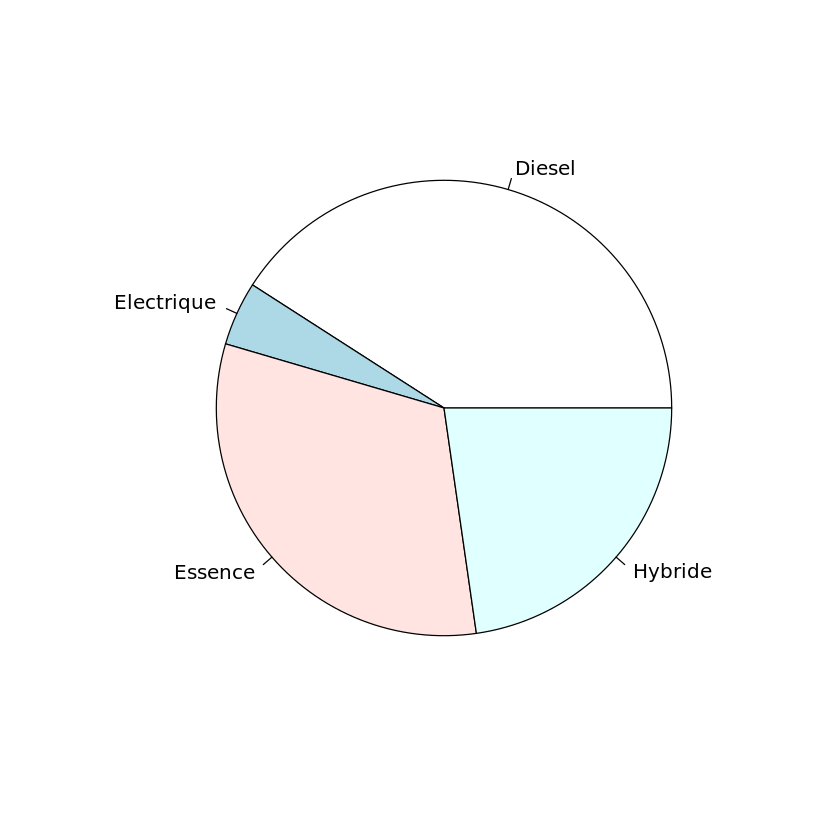

In [10]:
#cell 9
pie(table(motorisation$type_de_motorisation))

- Essayez de dessiner le même camembert en choisissant vous-mêmes des couleurs avec l'argument `col()` à partir des palettes de couleurs R (https://web.archive.org/web/20121202022815/http://research.stowers-institute.org/efg/R/Color/Chart/ColorChart.pdf)

Si je choisis mes couleurs:

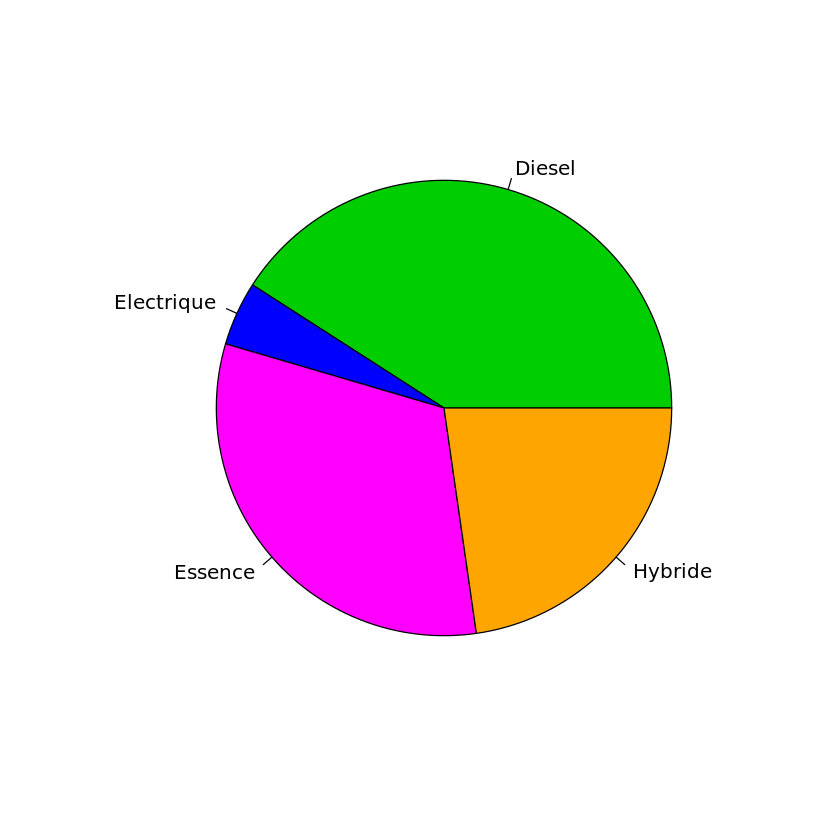

In [11]:
#cell 10
pie(table(motorisation$type_de_motorisation), col = c("green3","blue","magenta","orange"))

N’hesitez pas à decomposer la commande ci-dessus élement par élement pour bien la comprendre en tapant successivement:

In [12]:
# cell 10.2
?pie

pie {graphics},R Documentation
x,a vector of non-negative numerical quantities. The values in x are displayed as the areas of pie slices.
labels,"one or more expressions or character strings giving names for the slices. Other objects are coerced by as.graphicsAnnot. For empty or NA (after coercion to character) labels, no label nor pointing line is drawn."
edges,the circular outline of the pie is approximated by a polygon with this many edges.
radius,the pie is drawn centered in a square box whose sides range from -1 to 1. If the character strings labeling the slices are long it may be necessary to use a smaller radius.
clockwise,"logical indicating if slices are drawn clockwise or counter clockwise (i.e., mathematically positive direction), the latter is default."
init.angle,"number specifying the starting angle (in degrees) for the slices. Defaults to 0 (i.e., ‘3 o'clock’) unless clockwise is true where init.angle defaults to 90 (degrees), (i.e., ‘12 o'clock’)."
density,"the density of shading lines, in lines per inch. The default value of NULL means that no shading lines are drawn. Non-positive values of density also inhibit the drawing of shading lines."
angle,"the slope of shading lines, given as an angle in degrees (counter-clockwise)."
col,"a vector of colors to be used in filling or shading the slices. If missing a set of 6 pastel colours is used, unless density is specified when par(""fg"") is used."
"border, lty",(possibly vectors) arguments passed to polygon which draws each slice.


Alternativement: vous pouviez utiliser la commande `pie()` sans utiliser de tableau de contingence en donnant comme argument x un vecteur avec les comptes de chaque valeur comme ci-dessous

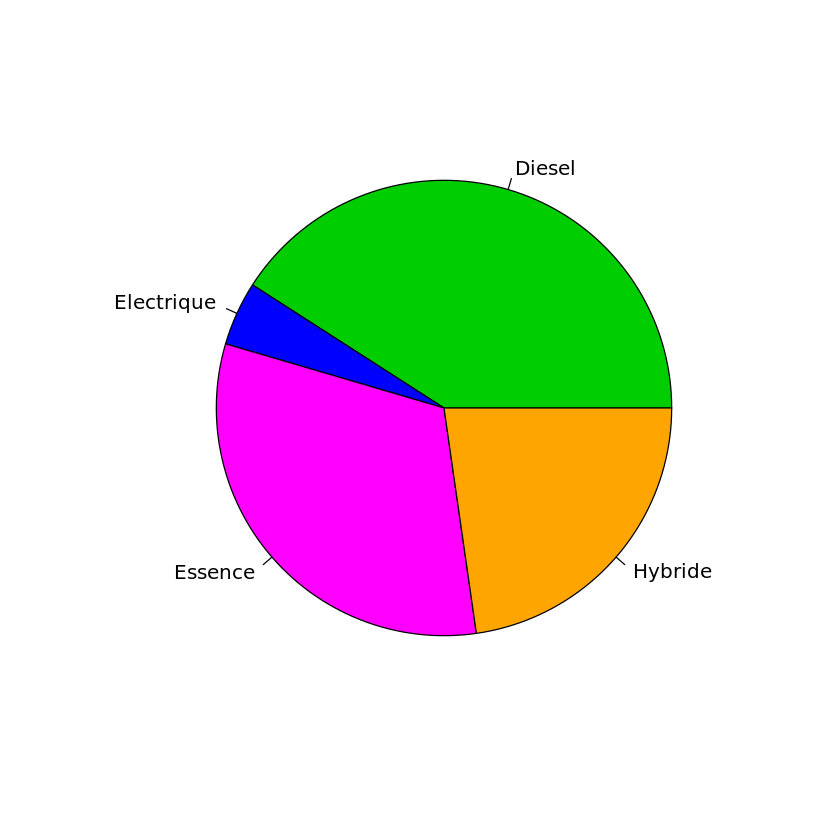

In [13]:
#cell 10.3
pie(c(9, 1, 7, 5), labels = c("Diesel","Electrique", "Essence", "Hybride"),
    col = c("green3","blue","magenta","orange"))

Vous pouvez ajouter l'argument clockwise=TRUE pour changer l'orientation des parts
Ici, j'ai ecrit `labels=c("Diesel","Electrique", "Essence", "Hybride")` mais on aurait pu ecrire egalement `labels = names(table(motorisation$type_de_motorisation))` ou `labels = sort(unique(motorisation$type_de_motorisation)` car `unique()` retourne chaque occurence/valeur possible de la variable et la fonction `sort()` les trie par ordre alphanumerique

Enfin, si vous voulez afficher les parts du camembert par ordre croissant, vous pouvez appliquer la fonction `sort()` sur la valeur obtenue par la commande (table(motorisation$type_de_motorisation))`.

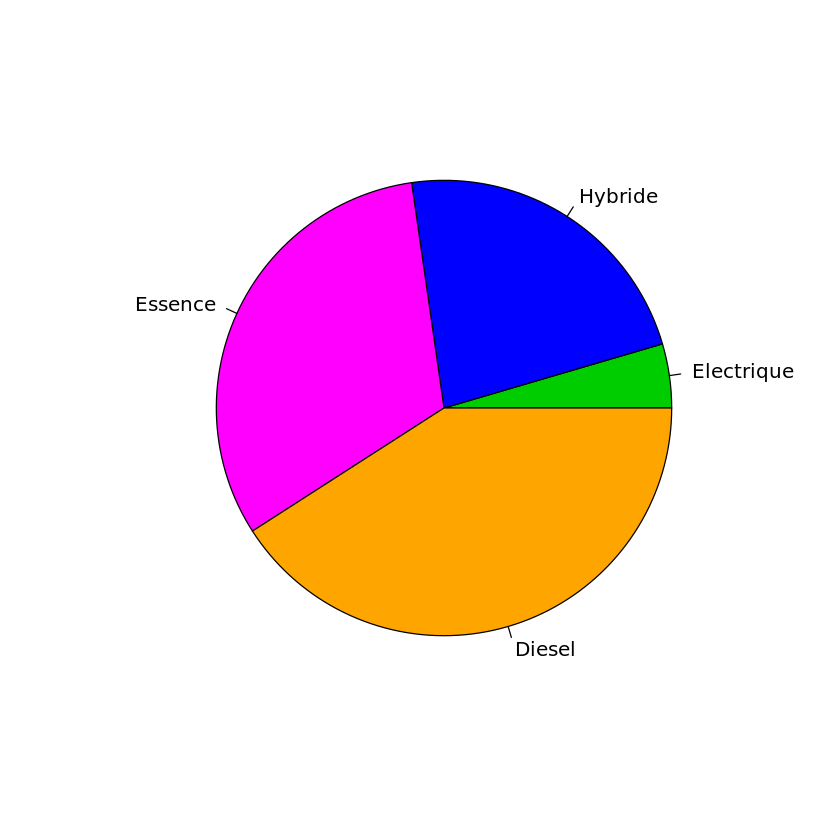

In [14]:
#cell 10.4
pie(sort(table(motorisation$type_de_motorisation)), col = c("green3","blue","magenta","orange")) # les couleurs sont attribuées dans le nouvel ordre...qui est peut etre mieux car diesel n'est plus en vert!

- Générez également un diagramme en bâtons avec les proportions (fréquences relatives) des différentes motorisations colorées comme dans le camembert.

*__Tip :__*_fonctions recommandées :
    `table()`,
    `barplot()`_

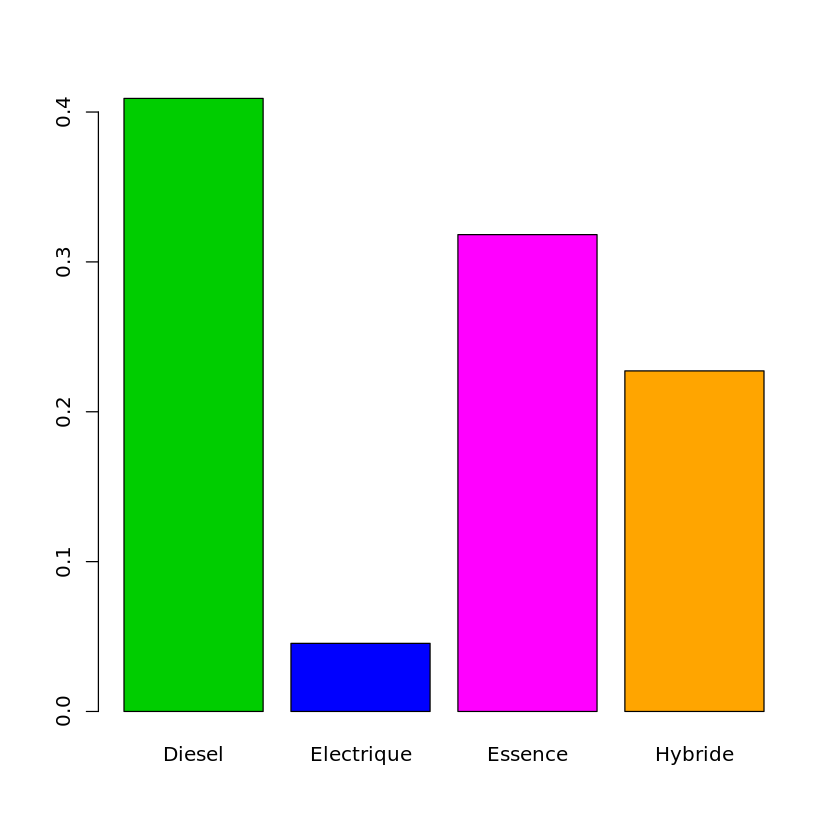

In [15]:
#cell 11
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
        col = c("green3","blue","magenta","orange"))

=> Il s'agit bien d'un barplot (diagramme en batons) adapté a des donnees qualitatives ou quantitatives discrètes et non d'un histogramme adapté a des variables continues

> N’hesitez pas à agrandir votre fenetre d’affichage pour voir les noms sous les batons si vous êtes sur rstudio…ou reduisez leur taille en utilisant l’argument cex.names:

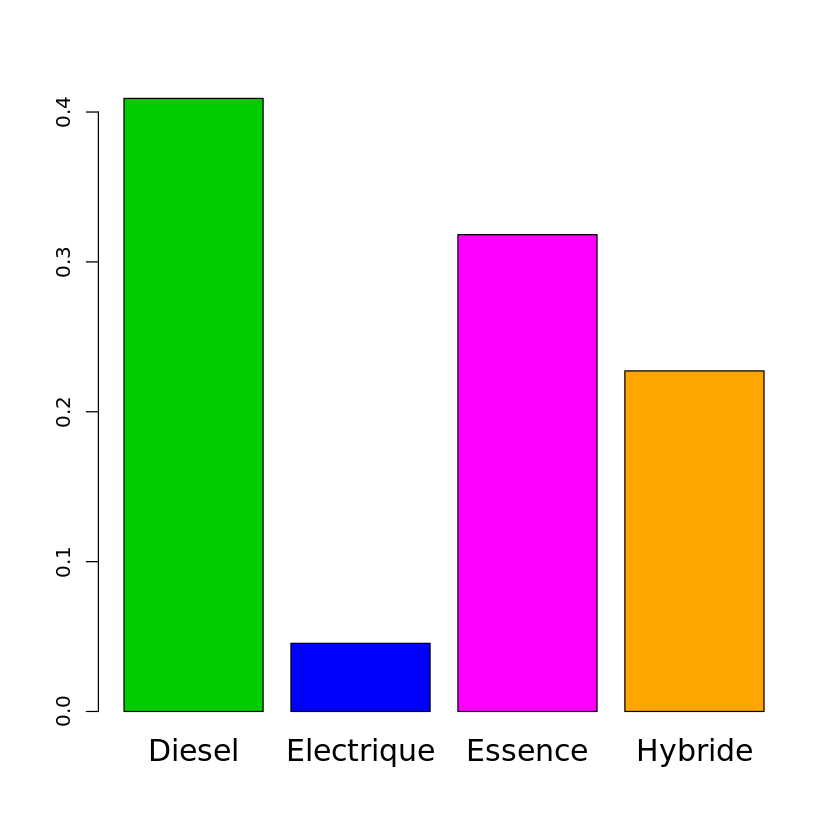

In [16]:
#cell 11.2
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
        cex.names = 1.5,
        col = c("green3","blue","magenta","orange"))

Il est aussi possible d’utiliser barplot avec une matrice comme argument `x`. Dans ce cas, par defaut avec l’argument `beside = FALSE`, les élements du diagramme en baton seront empilés.

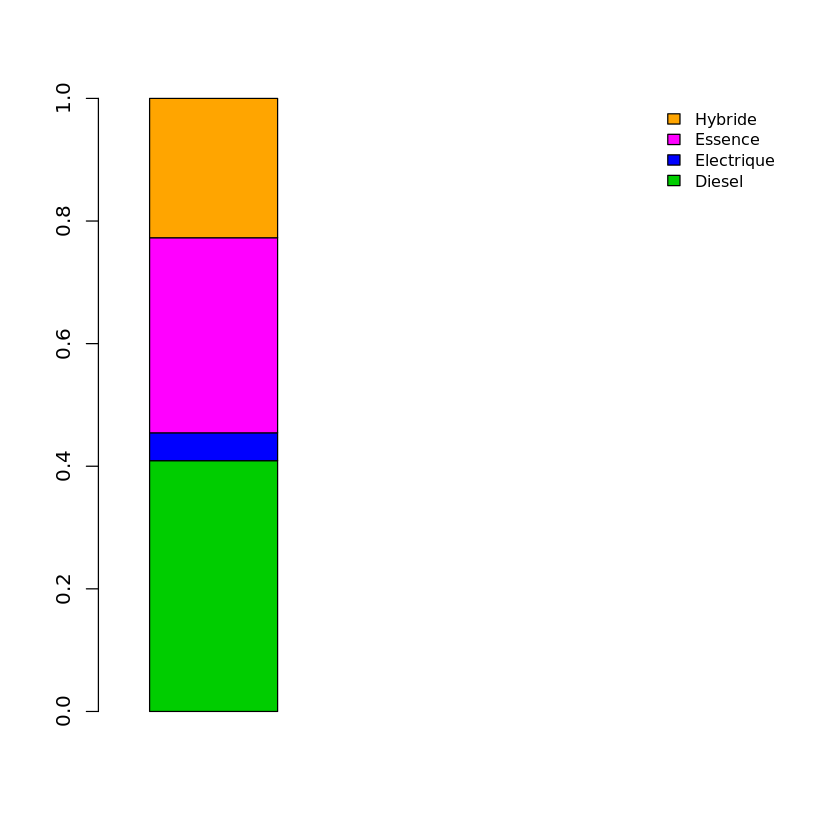

In [17]:
#cell 11.3
barplot(matrix(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation)),
        col = c("green3","blue","magenta","orange"),
        legend.text = unique(sort(motorisation$type_de_motorisation)),
        args.legend = list(x = "topright", cex = 0.8, bty = "n"),
        width = 1,
        xlim = c(0,5) )

Si vous voulez les afficher du plus grand au plus petit effectif, ajouter `sort()` en precisant `decreasing=T`

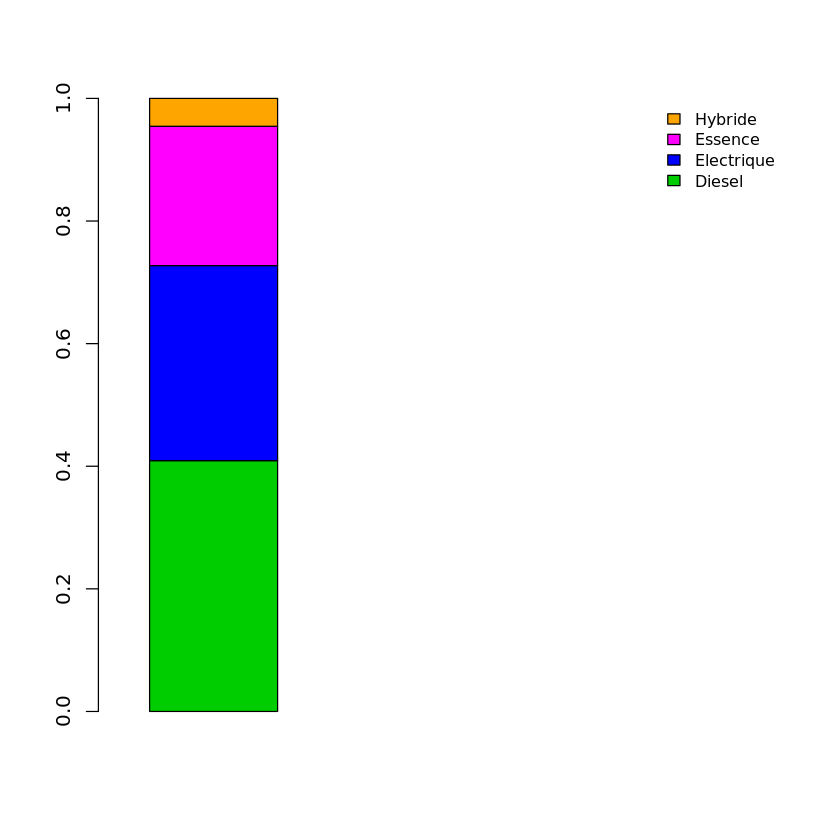

In [18]:
#cell 11.4
barplot(matrix(sort(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),decreasing = T)),
        col = c("green3","blue","magenta","orange"),
        legend.text = unique(sort(motorisation$type_de_motorisation)),
        args.legend = list(x = "topright", cex = 0.8, bty = "n"),
        width = 1,
        xlim = c(0,5) )

- Avec la fonction `par()` que vous appellerez avant les deux commandes de chaque graphique, disposez les deux graphes côte à côte sur un même graphique.

*__Tip :__*_fonctions recommandées :
    `par()`avec l’argument `mfrow`_

Warning message in par(opar):
“graphical parameter "cin" cannot be set”
Warning message in par(opar):
“graphical parameter "cra" cannot be set”
Warning message in par(opar):
“graphical parameter "csi" cannot be set”
Warning message in par(opar):
“graphical parameter "cxy" cannot be set”
Warning message in par(opar):
“graphical parameter "din" cannot be set”
Warning message in par(opar):
“graphical parameter "page" cannot be set”


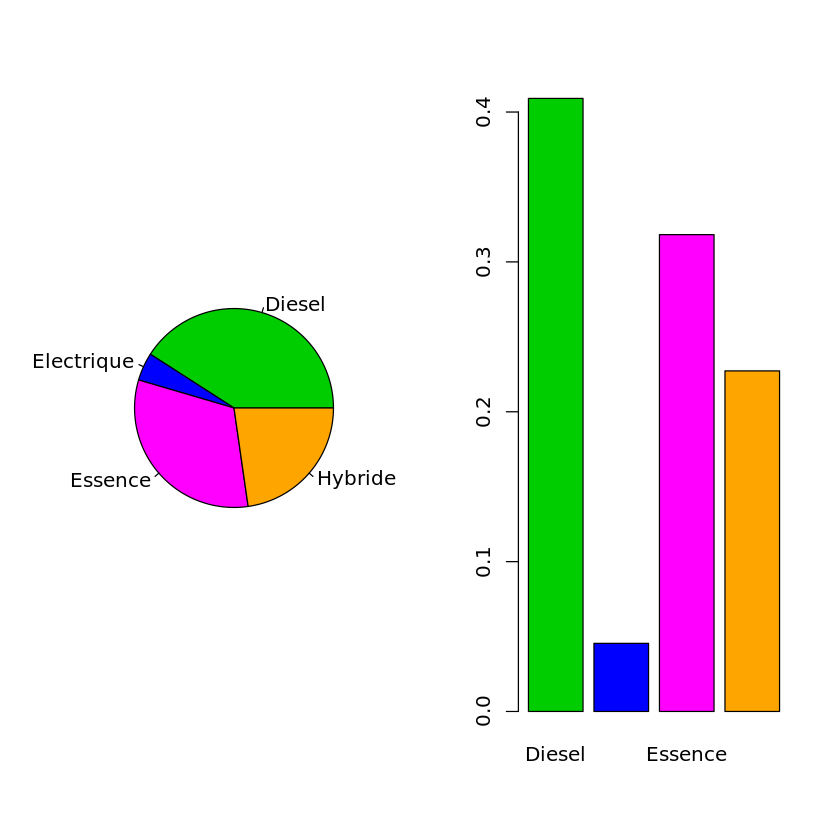

In [19]:
#cell 12
opar <- par()
par(mfrow = c(1,2)) 
pie(table(motorisation$type_de_motorisation), col = c("green3","blue","magenta","orange"))
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),col = c("green3","blue","magenta","orange"))
suppressWarnings(par(opar, warn=F))# avec supressWarnings() j'évite l'affichage des warnings
par(opar)

=> Version finale pour aller plus loin en integrant des alternatives décrites pour chaque figure et avec les bonnes règles d’affichage du script R:

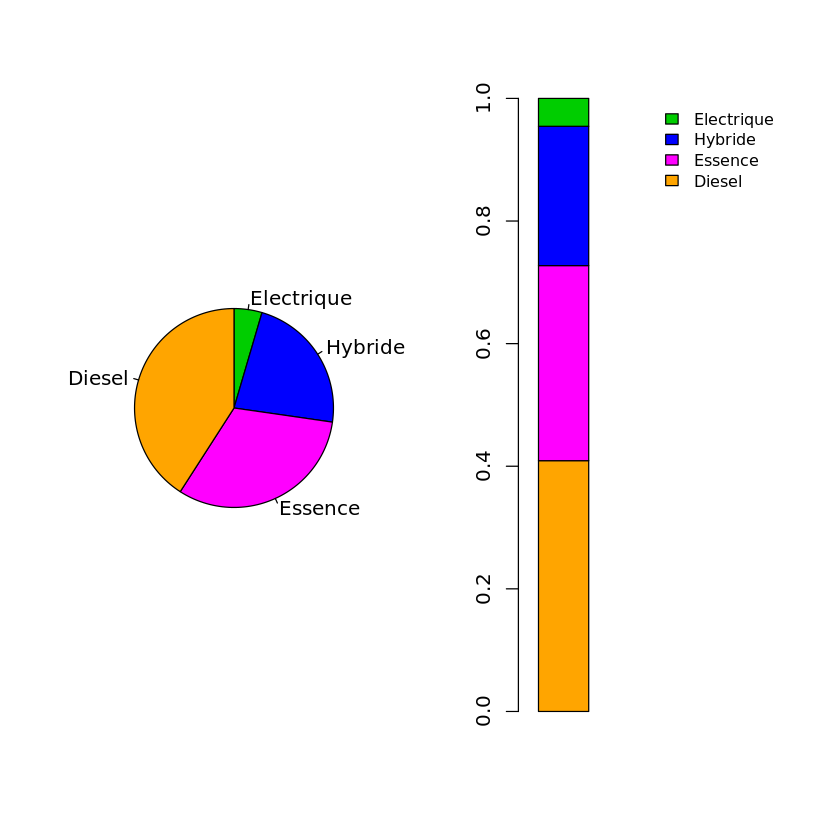

In [20]:
#cell 12.2
opar <- par()
par(mfrow = c(1,2)) 
pie(sort(table(motorisation$type_de_motorisation)),
    col = c("green3","blue","magenta","orange"),
    clockwise = T)  
barplot(matrix(sort(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
                     decreasing = T)),
         col = c("orange","magenta","blue","green3"),
         legend.text = names(sort(table(motorisation$type_de_motorisation)
                                  ,decreasing = T)),
         args.legend = list(x = "topright", cex = 0.8, bty = "n"),
         width = 1,
         xlim = c(0,5))
suppressWarnings(par(opar))

<div class="alert alert-block alert-danger"><b>Attention:</b> Vous noterez qu’il est préférable de visualiser les donnees qualitatives, comme ici le type de motorisation, au moyen d’un diagramme en bâtons. Cela vous ai rappele en ‘Note’ dans la fenetre d’aide de la fonction pie!</div>


## Exercice 2: représentation graphique de la distribution d’une variable quantitative continue
---

Tirez aléatoirement un ensemble de 100 nombres compatibles avec une distribution normale de moyenne 10 et d’écart type 5.

Sauvegardez-les dans un objet R.

*__Tip :__*
_fonction recommandée : `norm()`_

In [21]:
#cell 13
myrandomdata <- rnorm(100, mean = 10, sd = 5)# bien penser à assigner le resultat de votre tirage dans un objet, sinon, les valeurs changent à chaque fois que vous effectuez un tirage avec la commande rnorm!

Tracez la représentation histogramme des valeurs obtenues.

*__Tip :__*_fonction recommandée : `hist()`_


In [22]:
#cell 14

Changez le nombre d’intervalles de l’histogramme : environ 5, 50 et 100.

*__Tip :__*_fonction recommandée : `hist()` avec l'argument `breaks`_

In [23]:
#cell 15

Tracez également une boite à moustache horizontale de ces data.

*__Tip :__*_fonction recommandée : `boxplot()`_

In [24]:
#cell 16

Affichez les 3 histogrammes et le boxplot les uns en dessous des autres dans une même fenêtre graphique.

*__Tip :__*_fonction recommandée : `par()` avec l'argument `mfrow`_

Je ne vous détaille pas ici chaque graphique, je les empile tout de suite:

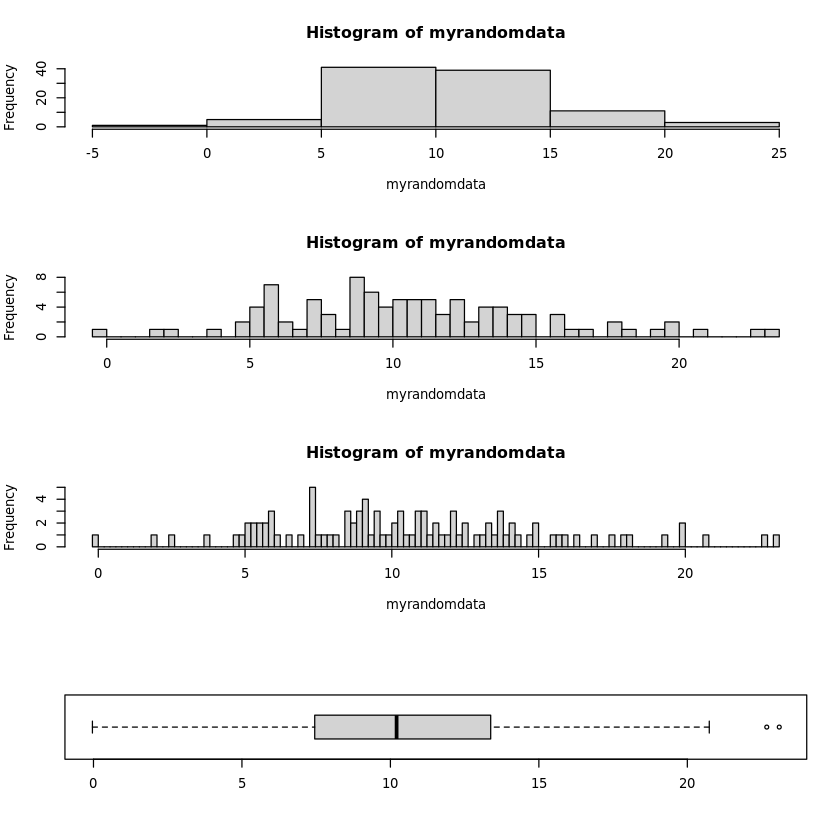

In [25]:
#cell 17
opar <- par()
par(mfrow = c(4,1))
hist(myrandomdata, breaks = 5)
hist(myrandomdata, breaks = 50)
hist(myrandomdata, breaks = 100)
boxplot(myrandomdata, horizontal = T)
suppressWarnings(par(opar))


## Exercice 3 facultatif: lois de probabilité
---

<span style="color:blue">  <b>=> Q1: </b> <br>
Si X suit une loi normale de moyenne 10 et d’écart type 5, quelle est la probabilité P(7≤X≤15) ?
Arrondissez à trois décimales.</span>



*__Tip :__*_fonction recommandée : `pnorm()`, `round()`_

In [26]:
#cell 18
round(pnorm(q = 15, mean = 10, sd = 5) - pnorm(q = 7, mean = 10, sd = 5), 3)  

[1] 0.567

N'oubliez pas que l'aire totale sous la courbe est égale à 1 car la probabilité d'avoir une valeur entre -Inf et +Inf dans une telle loi est égale à 1.

Il faut calculer d'abord la probabilite que X<15, cad l'aire sous la courbe de la loi de probabilite de la loi normale, puis soustraire la probabilite que x<7!

Alternativement, vous pouviez jouer sur le côté de l'aire sous la courbe affichée.

In [27]:
#cell 18.2
round(1 - pnorm(q = 15, mean = 10, sd = 5, lower.tail = FALSE) - pnorm(q = 7, mean = 10, sd = 5), 3)

[1] 0.567

<span style="color:blue">  <b>=> Q2: </b> <br>
Si X suit une loi normale de moyenne μ=10 et d’écart type σ=5, quelle est la valeur de k telle que P(X≤k)=0.67 ?
Arrondissez à une décimale.</span>

*__Tip :__*_fonction recommandée : `qnorm()`, `round()`_

In [28]:
#cell 19
round(qnorm (p = 0.67, mean = 10, sd = 5), 1)

[1] 12.2

<span style="color:blue">  <b>=> Q3: </b> <br>
Soit un test de Chi2 à 3 degrés de libertés avec une valeur de la statistique de `Chi2=6.26`. Quelle est la p-value de ce test ?
Arrondissez à quatre décimales.</span>

*__Tip :__*_fonction recommandée : `pchisq()`, `round()`_

In [29]:
#cell 20
round(pchisq(q = 6.26, 3, lower.tail = F), 4)

[1] 0.0996

La distribution d'une loi de Chi2 est asymétrique. La pvalue correspond à l'aire sous la courbe à droite de la valeur du seuil considérée. Vous vous souvenez peut-être que pour un Chi2 à 1 dll, le test est significatif avec un risque alpha de 5% lorsque la valeur statistique du Chi2 est supérieure au seuil 3.84:

In [30]:
#cell 20.2
round(pchisq(3.84,1, lower.tail=F), 4)

[1] 0.05

On obtient bien 5% pour l'aire sous la courbe à droite de 3.84. Alternativement, vous pouvez retrouver cette valeur de 3.84 avec la fonction qchisq en indiquant 1 ddl et alpha = 5:

In [31]:
#cell 20.3
qchisq(0.05, 1, lower.tail=F)

[1] 3.841459


## Exercice 4 *facultatif*: représentations graphiques de données quantitatives
---
Nous allons travailler avec le jeu de données `airquality`.

- **Récupérez le jeu de données `airquality`** disponible sous R avec la fonction `data()` et vérifiez sa structure.

*__Tip :__*_fonctions recommandées : `data()`, 
   `str()`_

In [32]:
#cell 21
data(airquality)
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


- **Créez les graphes de la figure ci-dessous** avec ce jeu de données.

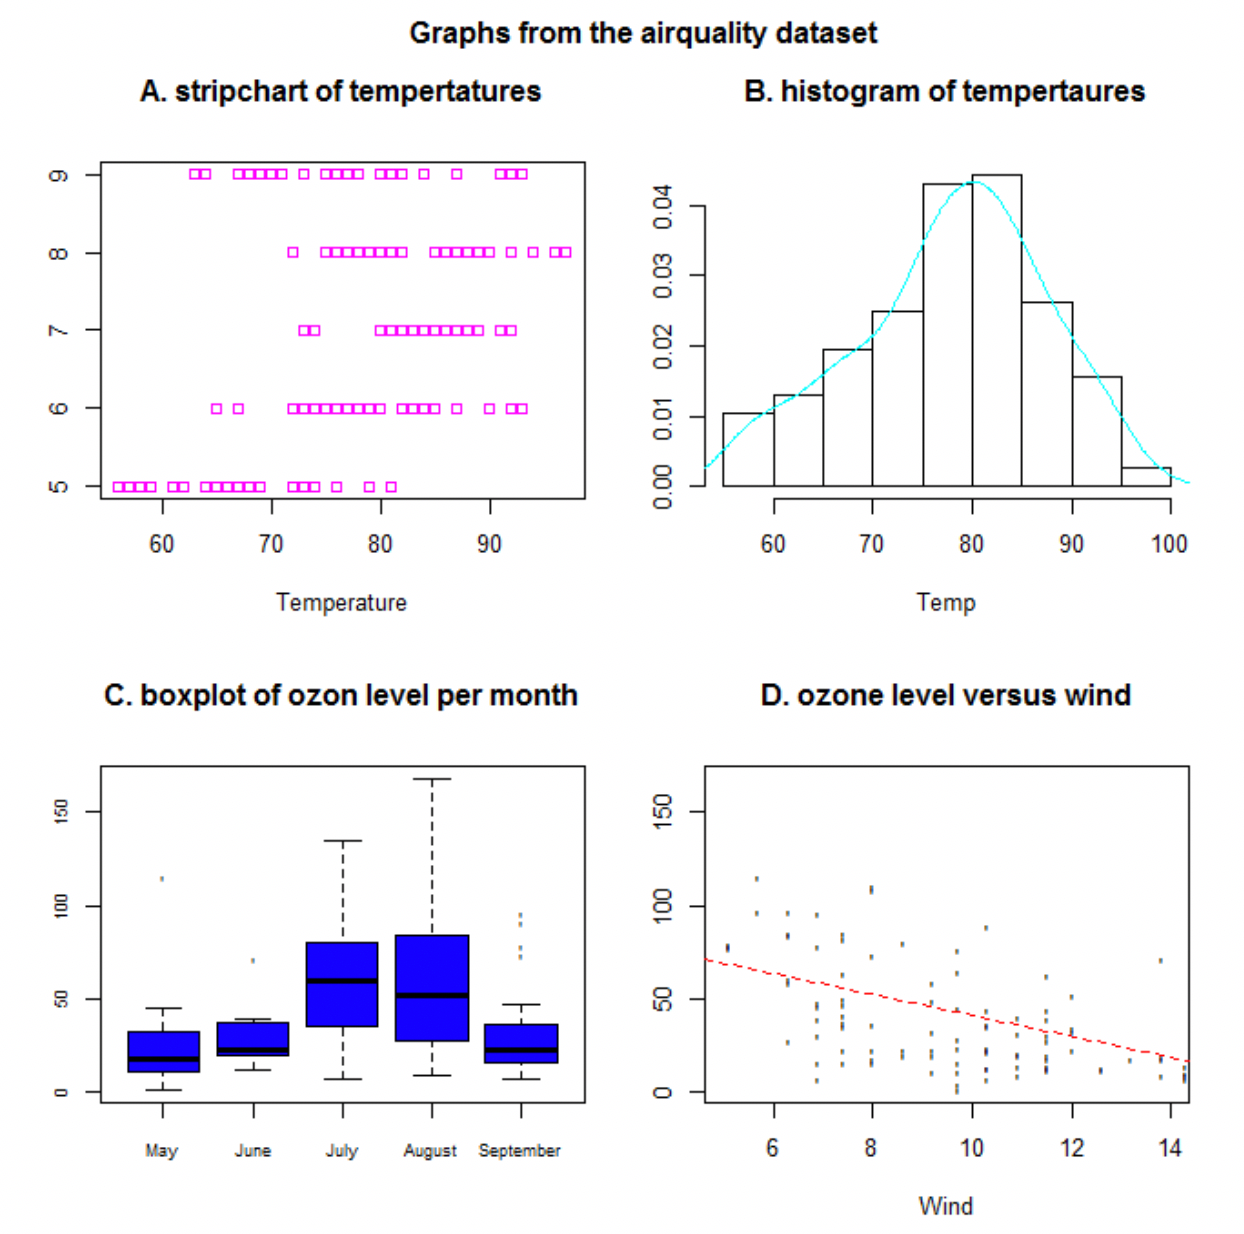

*__Tip :__*_fonctions recommandées :
    `par()` avec les arguments `mfrow` et `mar`,
    `plot()`,
  `lines()`,
    `boxplot()`,
    `abline()`,
    `lm()`,
    `title()`_

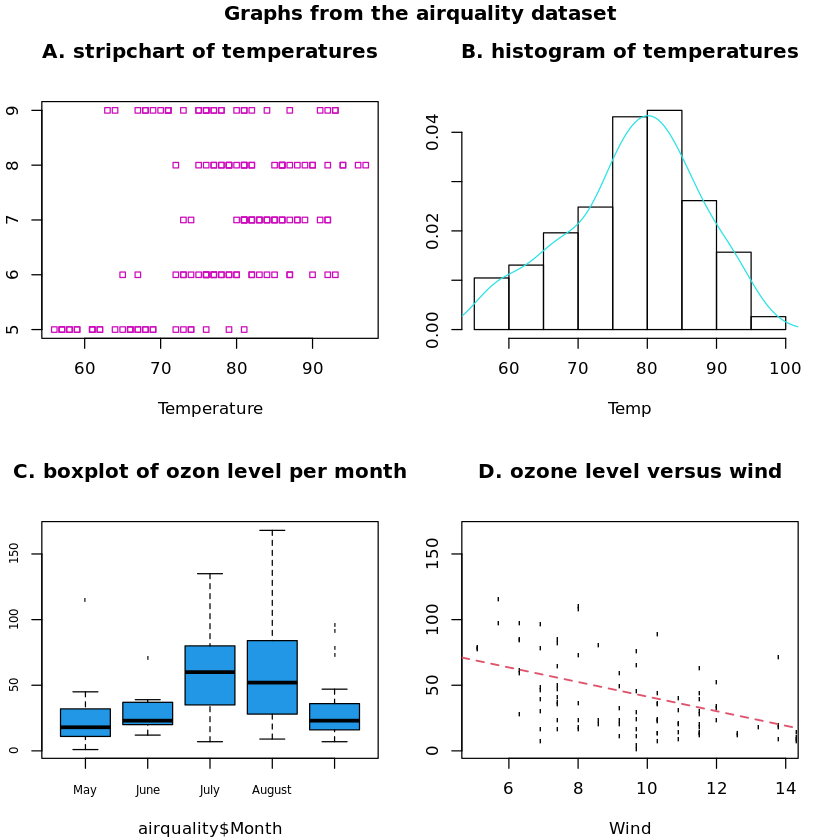

In [33]:
#cell 22
opar <- par()
par(mfrow = c(2,2),
    mar = c(4.1, 2.1, 5.1, 2.1))
stripchart(airquality$Temp~airquality$Month,
           pch = 22,
           xlab = "Temperature", ylab = "Month",
           main = "A. stripchart of temperatures",
           col = 6)
hist(airquality$Temp,
     xlab = "Temp",
     freq = FALSE,
     col="transparent",
     main = "B. histogram of temperatures")
lines(density(airquality$Tem), col = 5)
boxplot(airquality$Ozone~airquality$Month,
        names = c("May", "June", "July", "August", "September"),
        cex.axis = 0.7,
        col = 4,
        pch = "'",
        main = "C. boxplot of ozon level per month")
plot(airquality$Ozone~airquality$Wind,
     xlab = "Wind",
     ylab = "Ozone",
     xlim = c(5,14),
     pch = "'",
     main = "D. ozone level versus wind")
abline(lm(airquality$Ozone~airquality$Wind),
       col = 2, lty = 2, lwd = 1.5)
title("Graphs from the airquality dataset", outer = T, line = -1)
suppressWarnings(par(opar))

For the boxplots, you could also have generated a factor with names to each level:

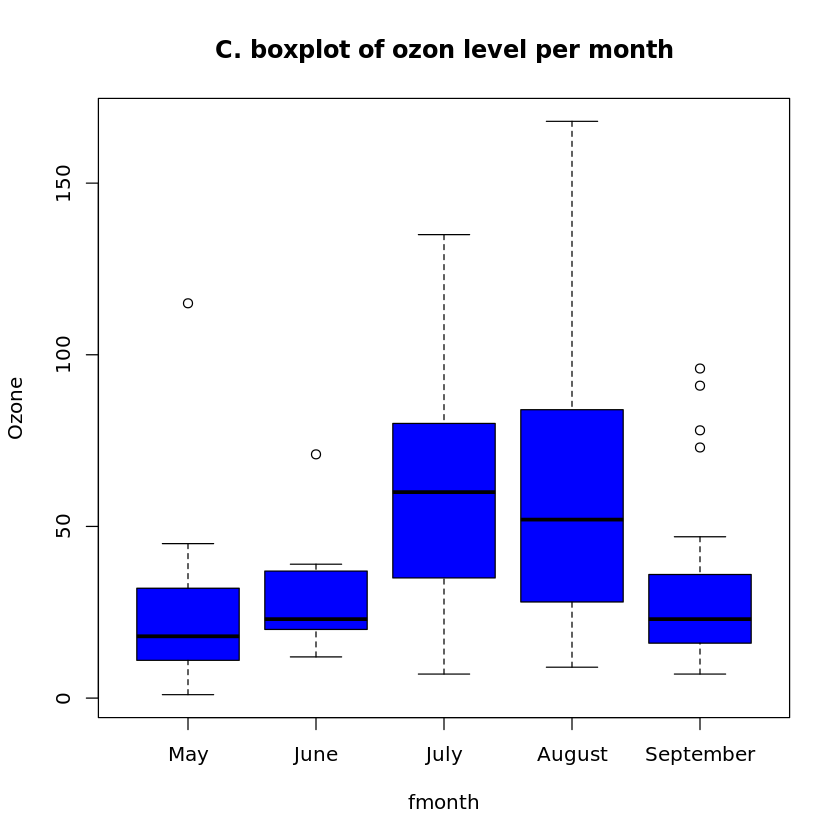

In [34]:
#cell 22.2
fmonth <- factor(airquality$Month,levels = 5:9)
levels(fmonth) <- c("May","June","July","August","September")
boxplot(airquality$Ozone ~ fmonth ,
        col = "blue",
        ylab = "Ozone",
        main = "C. boxplot of ozon level per month")

<mark><b>IMPORTANT NOTE ON NAMES OF VARIABLES:</b>
Here for boxplot as for most R functions, you may enter the name of the dataframe for once with the argument `data`, and then just put the name of the variables without repeating the name of the dataframe</mark>

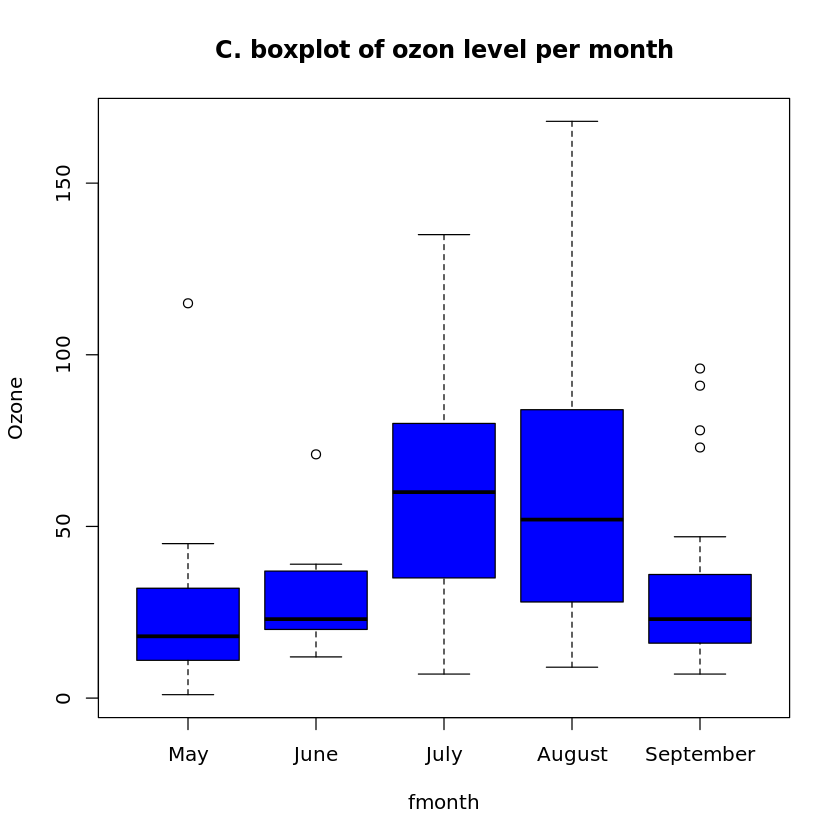

In [35]:
#cell 22.3
boxplot(data = airquality, Ozone~fmonth , col = "blue", ylab = "Ozone", main = "C. boxplot of ozon level per month")

Alternatively, you may use `attach()` to access to the variables of the dataset directly by their name, then enter your commands, and then `detach()` once finsihed. I don't recommand this last method as we often forget to detach.

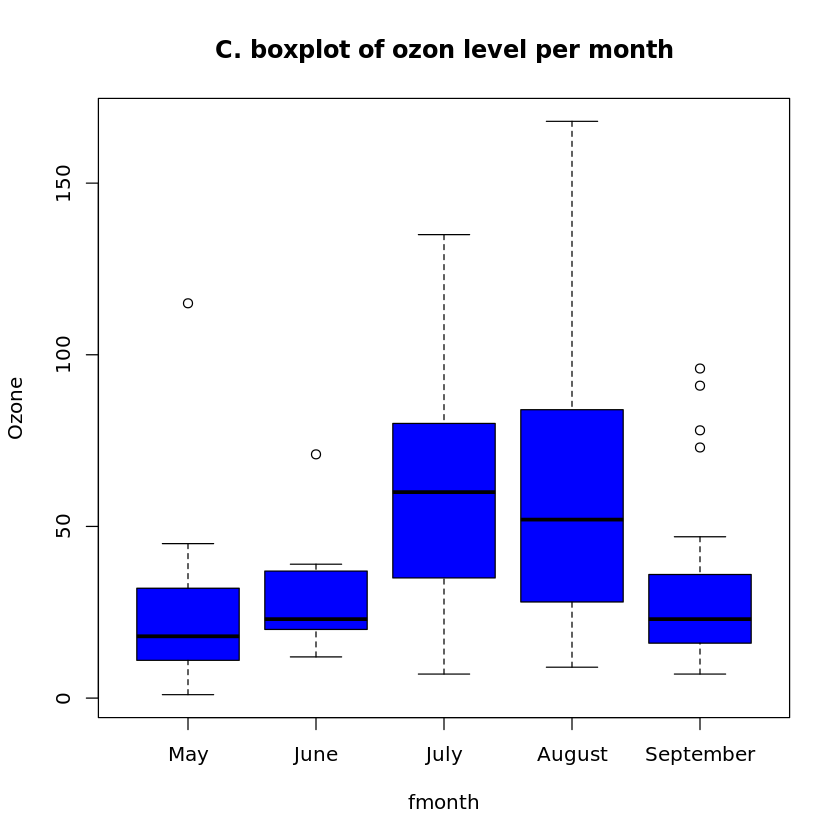

In [36]:
#cell 22.4
attach(airquality)
boxplot(Ozone ~ fmonth , col = "blue", ylab = "Ozone", main = "C. boxplot of ozon level per month")
detach(airquality)

## Exercice 5 : test de comparaison de moyennes, impact de la différence entre les moyennes et de la variance
---

### 5.1. Test de comparaison de moyennes

Nous allons d'abord tirer deux échantillons de deux populations présentant des **moyennes différentes et une même variance**.

A titre d'exemple dans ce practical nous prendrons la "taille des humains debout" comme trait d'intérêt.
En France en 2001, les données de l'INSEE indiquaient une taille moyenne de 1.62 pour les femmes et de 1.74 m pour les hommes. Dans l'ensemble de la population, l'écart-type était d'environ 7 cm.

- Générez 2 échantillons `sample1` et `sample2` de taille 100 issus de la population d'hommes et de femmes avec les paramètres indiqués en supposant que la densité de probabilité de la taille suit une loi normale.

*__Tip:__ utiliser la fonction `rnorm()`*

In [37]:
#cell 23
sample1 <- rnorm(n = 100, mean = 174, sd = 7)

In [38]:
#cell 24
sample2 <- rnorm(n = 100, mean = 162, sd = 7)

- Regardez les valeurs résumées des distributions observées et faites un simple boxplot de ces distributions.

*__Tip:__ utiliser les fonctions `summary()` et `boxplot`*

In [39]:
#cell 25
summary(sample1)
summary(sample2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  157.8   168.4   173.1   173.1   178.3   193.8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  144.5   157.6   163.2   162.6   167.1   181.2 

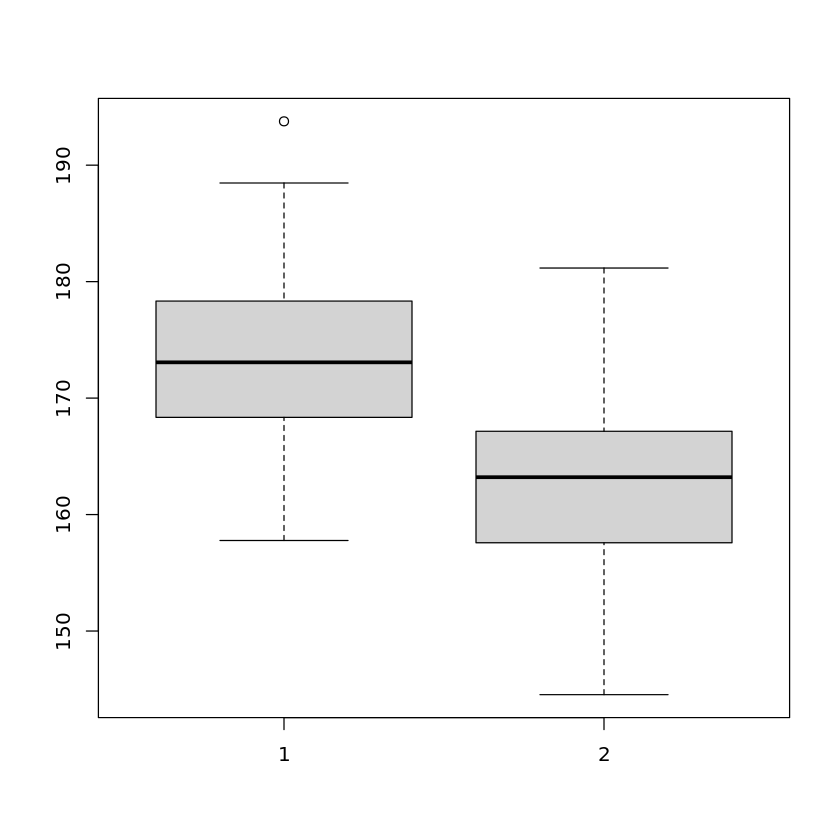

In [40]:
#cell 26
boxplot(sample1, sample2)

- Testez la différence des moyennes entre les deux populations d'où sont issus ces échantillons avec un test de Student bilatéral

*__Tip:__ utiliser la fonction `t.test()`*

In [41]:
#cell 27
t.test(sample1, sample2, alternative = "two.sided")


	Welch Two Sample t-test

data:  sample1 and sample2
t = 9.85, df = 197.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  8.447018 12.675932
sample estimates:
mean of x mean of y 
 173.1347  162.5732 


- Quelle est la valeur de la p-value?

*__Tip:__ utilisez la fonction `str()` pour voir comment extraire cette pvalue du test*

In [42]:
#cell 28
str(t.test(sample1, sample2, alternative = "two.sided"))

List of 10
 $ statistic  : Named num 9.85
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 198
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 7.01e-19
 $ conf.int   : num [1:2] 8.45 12.68
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 173 163
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 1.07
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "sample1 and sample2"
 - attr(*, "class")= chr "htest"


In [43]:
#cell 28.2
t.test(sample1, sample2, alternative = "two.sided")$p.value

[1] 7.012047e-19

### 5.2. Impact de la taille des échantillons, de la différence des moyennes ou de la variance

Nous allons à présent étudier l'impact de la différence entre les moyennes des populations de départ ou celui de la variance sur la puissance de détecter une différence.

- Pour jouer sur ces différents paramètres, on écrit une fonction qui prend comme argument la taille des échantillons, la moyenne et la variance de chacune des populations, et qui renvoie la statistique t et la pvalue du test de Student.

In [44]:
# cell 29
compute_tv <- function(n1, m1, s1, n2, m2, s2){
    sample1 <- rnorm(n = n1, mean = m1, sd = s1)
    sample2 <- rnorm(n = n2, mean = m2, sd = s2)
    tval <- t.test(sample1, sample2, alternative = "two.sided")$statistic
    pval <- t.test(sample1, sample2, alternative = "two.sided")$p.value
    tv <- list("t" = tval, "p" = pval)
    return(tv)
}

- Faites le test en prenant à présent les **écarts types différents** chez les hommes et les femmes qui sont respectivement de 7.1 cm et 6.5 cm dans la population Française en 2001.

In [45]:
# cell 30
compute_tv(n1 = 100, m1 = 174, s1 = 7.1, n2 = 100, m2 = 162, s2 = 6.5)

$t
       t 
12.95589 

$p
[1] 4.40843e-28

- Refaites le test **en réduisant les effectifs** à 30 pour chaque échantillon.

In [46]:
# cell 31
compute_tv(n1 = 30, m1 = 174, s1 = 7.1, n2 = 30, m2 = 162, s2 = 6.5)

$t
       t 
7.906549 

$p
[1] 1.014823e-10

<span style="color:blue">**=> Comment a varié la significativité?**</span>

Les paramètres de la distribution de la taille des humains varient aussi entre les populations dans le monde.

- Refaites le test avec ces effectifs de 30, en gardant la même différence entre les moyennes mais **en augmentant la variance** à 25 pour chaque population.

In [47]:
# cell 32
compute_tv(30, 174, 25, 30, 162, 25)

$t
       t 
3.496085 

$p
[1] 0.0009393486

<span style="color:blue">**=> La différence, même importante entre les moyennes des populations, est-elle encore détectable?**</span>

- Refaites le test avec des populations présentant une **petite différence entre les moyennes**  (3 cm avec par exemple 160 cm pour les femmes et 163 cm pour les hommes) et **des variances faibles** (3 cm)

In [48]:
# cell 33
compute_tv(30, 163, 3, 30, 160, 3)

$t
       t 
3.766789 

$p
[1] 0.0004220147

<span style="color:blue">**=> Détectez-vous quand même une différence statistiquement significative?**</span>

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
La puissance du test augmente avec:
    
- la taille des échantillons
- la différence entre les moyennes des populations
- une petite variance </div>

### 5.3. Effet des tests multiples sur le taux de faux positifs
---

Nous sommes en trés dans l'ère des données massives. Par exemple, dans les jeux de données omiques, on effectue autant de tests que de "features" (eg gènes).

Nous n'allons pas générer dans ce practical de multiples features mais nous allons prendre notre trait de la taille et tester, par simulation, l'impact des tests multiples sur les faux positifs.

Nous partons d'un dataframe que nous générons en rassemblant les données des deux échantillons dans un dataframe avec deux colonnes `height` et `grp` pour le groupe

*__Tip:__ utilisez la fonction `data.frame()` sur un vecteur concanténant les taille des deux échantillons avec la fonction `c()` et un vecteur répétant les valeurs 1 et 2 100 fois dans le bon ordre avec la fonction `rep()` et son argument `each=`*

In [49]:
# cell 34
df <- data.frame(height = c(sample1, sample2), grp = rep(c(1,2), each = 100))

Nous affichons les premières, dernières lignes du dataframe et sa structure. Comptez également le nombre d'observations appartenant au groupe 1 ou 2.

*__Tip:__ utilisez les fonctions `head()` , `tail()`, `str()` et `table()`.*

In [50]:
# cell 35
head(df)

,height,grp
,<dbl>,<dbl>
1,172.4721,1
2,169.6139,1
3,164.8554,1
4,170.7567,1
5,177.2878,1
6,172.9966,1


In [51]:
# cell 36
tail(df)

,height,grp
,<dbl>,<dbl>
195,160.4518,2
196,155.7155,2
197,163.5723,2
198,166.8967,2
199,166.3382,2
200,160.7885,2


In [52]:
# cell 37
str(df)

'data.frame':	200 obs. of  2 variables:
 $ height: num  172 170 165 171 177 ...
 $ grp   : num  1 1 1 1 1 1 1 1 1 1 ...


In [53]:
# cell 38
table(df$grp)


  1   2 
100 100 

- Nous allons **simuler 10000 échantillons sous une hypothèse nulle** où le groupe ne modifie pas les moyennes. Pour ce faire, on génére 10000 permutations de Monte-Carlo en tirant au hasard les statuts pour les groupes. Et on récupére les valeurs de tests `tvalues` et `pvalues` .

*Dans la commande ci-dessous, la fonction `for()` sert à  répéter le code 1000 fois. Dans la boucle, on génére un vecteur avec les valeurs perumutées pour le groupe et on effectue le test pour récupérer les valeurs p et de statsitique* 

In [54]:
# cell 39
tvalues <- c()
pvalues <- c()

for(i in 1:10000){
    perm_df <- df
    perm_df$grp <- sample(perm_df$grp, size=200)
    tval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$statistic
    tvalues <- c(tvalues, tval)
    pval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$p.value
    pvalues <- c(pvalues, pval)
}

- Affichez les valeurs résumées et un histogramme des statistiques t coontenues dans le vecteur `tvalues`:

In [55]:
# cell 40
summary(tvalues)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.691341 -0.682941  0.007294  0.000655  0.679293  3.802390 

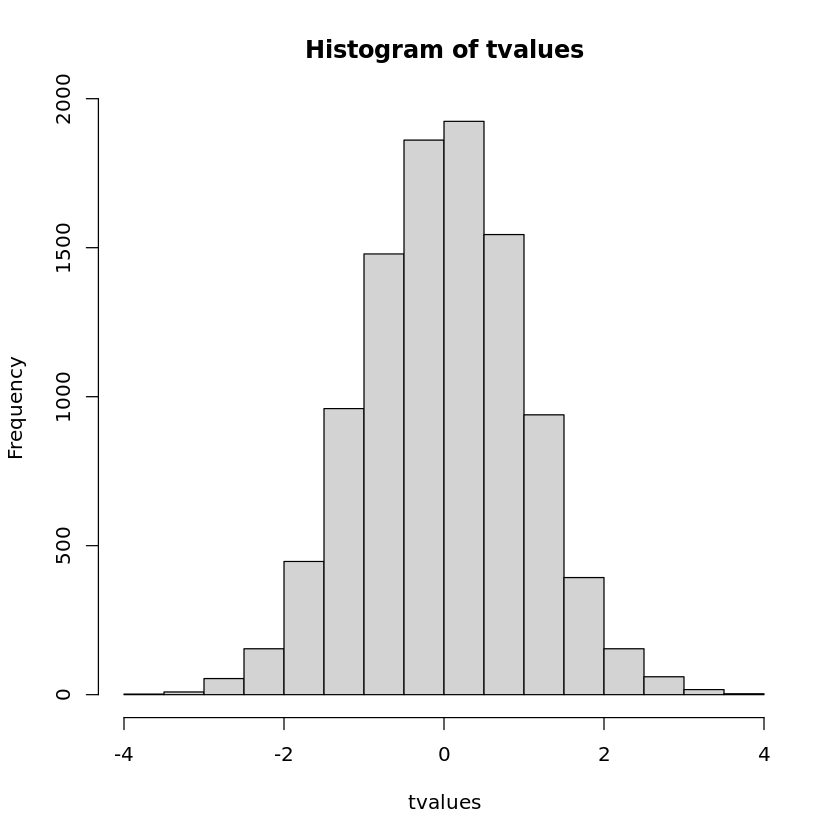

In [56]:
# cell 41
hist(tvalues)

- Combien de valeurs de statsitique sont significatives bien que conformes à H0? 


*__Tip:__ Utilisez la fonction `qnorm()` pour retrouver la valeur seuil d'une loi normale au risque alpha = 5%* 

In [57]:
# cell 42
qnorm(0.025, 0, 1, lower.tail=FALSE)

[1] 1.959964

In [58]:
# cell 43
length(which(abs(tvalues)>=1.96))

[1] 484

**=> Ce résultat était-il attendu?**

- Affichez les valeurs résumées et un histogramme des pvalues:

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0001909 0.2546077 0.4964284 0.4994415 0.7459379 0.9999321 

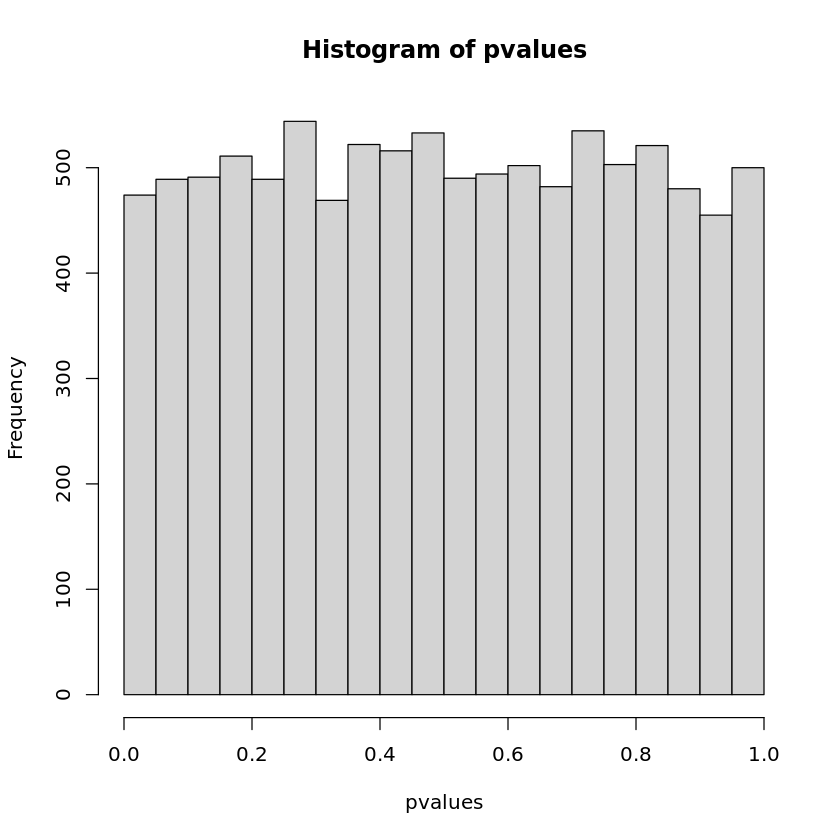

In [59]:
# cell 44
summary(pvalues)
hist(pvalues)

**=> Quelle est la distribution des pvalues sous HO?**

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
Sous HO:
    
- on obtient environ une proportion alpha de valeurs significatives -> si 10000 tests ont été effectués, cela fait envriron 500 différences significatives! Il faut donc corriger pour les tests multiples pour éviter un taux de faux positifs trop élevé.
- la distribution des pvalues est une distribution uniforme entre 0 et 1.</div>

## Exercice 6 facultatif: analyse de données
---

Importez dans R le fichier `poisson.txt` disponible dans `/srv/data/pass-rs-ue3/data`. Il s’agit d’un jeu de données de l’espèce de poisson “grand corégone” du lac Nathalie dans le territoire de la baie James (province du Québec) (d’après B. Scherrer). En 1977, Dumont a cherché les relations existantes entre le potentiel reproducteur (nombre d’œufs) de cette espèce de poisson (grand Corégone) et plusieurs caractères morphologiques. L’étude a été menée afin de déterminer une éventuelle relation entre le nombre d’œufs, révélant le potentiel reproducteur des poissons, et les variables morphologiques caractérisant ces poissons.

__1. Statistiques descriptives__

Identifier les variables et le nombre d’observations de l’échantillon.

_Fonctions recommandées :_
`read.table()`, `head()`, `dim()`, `str()`, `names()`

In [60]:
#cell 45
coregone <- read.table("/srv/data/pass-rs-ue3/data/poisson.txt", stringsAsFactors = FALSE, header = TRUE)
str(coregone)

'data.frame':	41 obs. of  5 variables:
 $ longueur_mm     : int  420 442 397 421 464 436 424 440 420 421 ...
 $ poids_total_g   : int  785 850 655 790 965 880 840 1030 770 890 ...
 $ poids_gonades_mg: num  74.1 54.5 49.6 71.6 69.4 ...
 $ age_annee       : int  12 10 9 9 11 9 8 12 10 10 ...
 $ oeufs_nombre    : int  10676 9461 8328 10281 14028 4984 13697 17206 13485 14055 ...


Calculer la moyenne, la variance et l’écart-type de chaque variable aléatoire.
    
_Fonctions recommandées:_
        `mean()`
        `var()`
        `sd()`
        `apply()`
        `summary()`

In [61]:
#cell 46
summary(coregone)

  longueur_mm    poids_total_g    poids_gonades_mg   age_annee    
 Min.   :397.0   Min.   : 655.0   Min.   : 31.30   Min.   : 8.00  
 1st Qu.:421.0   1st Qu.: 825.0   1st Qu.: 77.70   1st Qu.:10.00  
 Median :434.0   Median : 855.0   Median : 97.70   Median :10.00  
 Mean   :435.3   Mean   : 901.6   Mean   : 92.84   Mean   :10.39  
 3rd Qu.:443.0   3rd Qu.: 975.0   3rd Qu.:101.90   3rd Qu.:11.00  
 Max.   :487.0   Max.   :1310.0   Max.   :170.30   Max.   :13.00  
  oeufs_nombre  
 Min.   : 4984  
 1st Qu.:13139  
 Median :14606  
 Mean   :15071  
 3rd Qu.:16950  
 Max.   :25834  

Alternativement, vous pouviez utiliser la fonction `apply()`

In [62]:
#cell 47
cat("moyenne des variables:\n")
apply(coregone, 2, mean)# apply est une fonction qui permet d'appliquer des fonctions par colonne ou ligne d'un dataframe

moyenne des variables:


longueur_mm    poids_total_g poids_gonades_mg        age_annee 
       435.29268        901.58537         92.84390         10.39024 
    oeufs_nombre 
     15070.75610

In [63]:
#cell 48
cat("écart type des variables:\n")
apply(coregone, 2, sd)

écart type des variables:


longueur_mm    poids_total_g poids_gonades_mg        age_annee 
       19.755055       141.264110        25.247169         1.180636 
    oeufs_nombre 
     4173.765062

---
Réaliser les représentations des distributions de chaque variable aléatoire.

_Fonctions recommandées:_
    `hist()`, `par(mfrow = c(-,-))`, `curve()`, `dnorm()`


Ces variables vous semblent-elles distribuées selon une loi Normale ? Pour le vérifier, superposez sur chaque histogramme les courbes de densité des lois normales correspondantes (les moyennes et les variances sont estimées à partir des données de l’échantillon). Vous pouvez tracer par superposition la loi normale de même moyenne et écart type sur chaque histogramme. Vous pouvez également tracer le qqplot pour comparer la distribution de chaque variable à celle d’une loi normale. Enfin, vous pouvez tester l’hypothèse nulle de la normalité par un test de Shapiro.

_Fonctions recommandées:_
`curve()`, `dnorm()`, `qqplot()`, `qqline()`

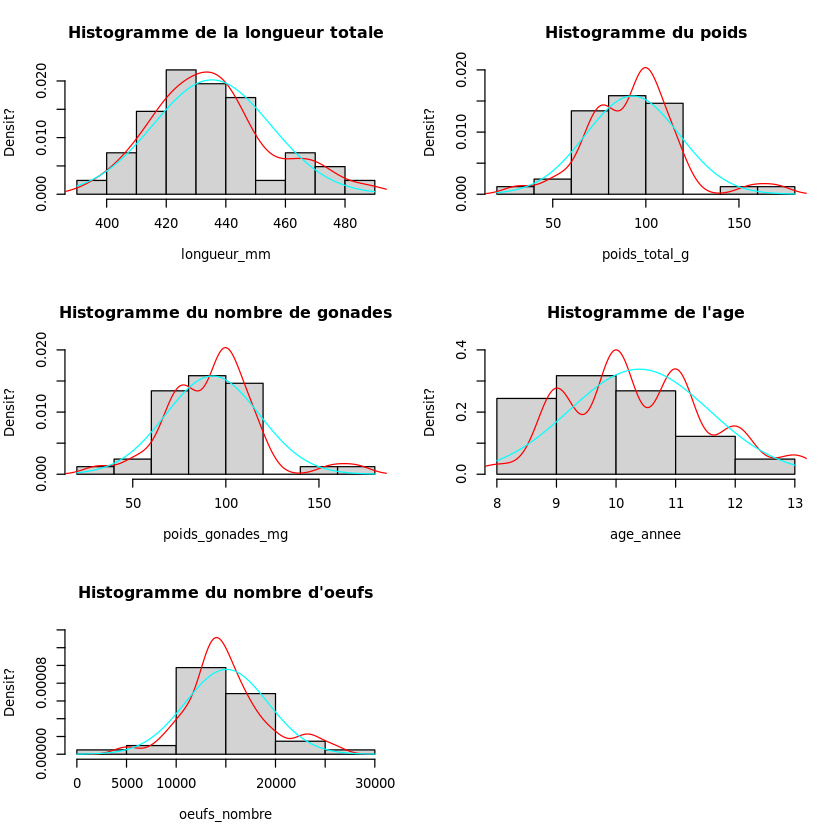

In [64]:
#cell 49
##histogrammes avec densite des donnees en rouge et loi normale supperposee en cyan
opar <- par()
par(mfrow = c(3, 2))

hist(coregone$longueur_mm,prob=T,
     main = "Histogramme de la longueur totale",
     xlab = colnames(coregone)[1],
     ylab = "Densit?")
lines(density(coregone$longueur_mm),col="red" )
curve(dnorm(x,mean(coregone$longueur_mm), sd(coregone$longueur_mm)), col="cyan", add=T)

hist(coregone$poids_g,prob=T,
     main = "Histogramme du poids",
     xlab = colnames(coregone)[2],
     ylab = "Densit?", ylim=c(0,0.02))
lines(density(coregone$poids_g), col="red" )
curve(dnorm(x,mean(coregone$poids_g),sd(coregone$poids_g)), col="cyan", add=T)

hist(coregone$poids_gonades_mg,prob=T,
     main = "Histogramme du nombre de gonades",
     xlab = colnames(coregone)[3],
     ylab = "Densit?", ylim=c(0,0.02))
lines(density(coregone$poids_gonades_mg),col="red" )
curve(dnorm(x,mean(coregone$poids_gonades_mg), sd(coregone$poids_gonades_mg)), col="cyan",add=T)

hist(coregone$age_annee,prob=T,
     main = "Histogramme de l'age",
     xlab = colnames(coregone)[4],
     ylab = "Densit?", ylim=c(0,0.4))
lines(density(coregone$age_annee),col="red" )
curve(dnorm(x,mean(coregone$age_annee), sd(coregone$age_annee)), col="cyan",add=T)

hist(coregone$oeufs_nombre,prob=T,
     main = "Histogramme du nombre d'oeufs",
     xlab = colnames(coregone)[5],
     ylab = "Densit?", ylim=c(0,1.4e-04))
lines(density(coregone$oeufs_nombre),col="red" )
curve(dnorm(x,mean(coregone$oeufs_nombre), sd(coregone$oeufs_nombre)),col="cyan",add=T)
suppressWarnings(par(opar))

Pour note: vous pouvez rechercher la valeur maximale sur l’axe des y en regardant le max de la densité et l’utiliser comme valeur dans l’argument `ylim`. Pour la distribution normale théorique, la moyenne est aussi le mode donc la valeur Y maximale, il suffit donc de récuperer la valeur Y à cette moyenne donnée par la fonction `dnorm()` :

In [65]:
#cell 50
dnorm(mean(coregone$oeufs_nombre),mean(coregone$oeufs_nombre),sd(coregone$oeufs_nombre))

[1] 9.558331e-05

Pour les valeurs de la variable avec `max(hist(variable)$density)` regardez la structure de l’histogramme avec `str()` et recuperez le max de la densité:

In [66]:
#cell 51
str(hist(coregone$oeufs_nombre, plot=F))

List of 6
 $ breaks  : num [1:7] 0 5000 10000 15000 20000 25000 30000
 $ counts  : int [1:6] 1 2 20 14 3 1
 $ density : num [1:6] 4.88e-06 9.76e-06 9.76e-05 6.83e-05 1.46e-05 ...
 $ mids    : num [1:6] 2500 7500 12500 17500 22500 27500
 $ xname   : chr "coregone$oeufs_nombre"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


In [67]:
#cell 51.2
max(hist(coregone$oeufs_nombre, plot=F)$density) # la valeur la plus grande sur l'axe des Y

[1] 9.756098e-05

On peut aussi representer des qqplot: comparaison de la distribution des données à une distribution connue, ici à celle d’une loi normale

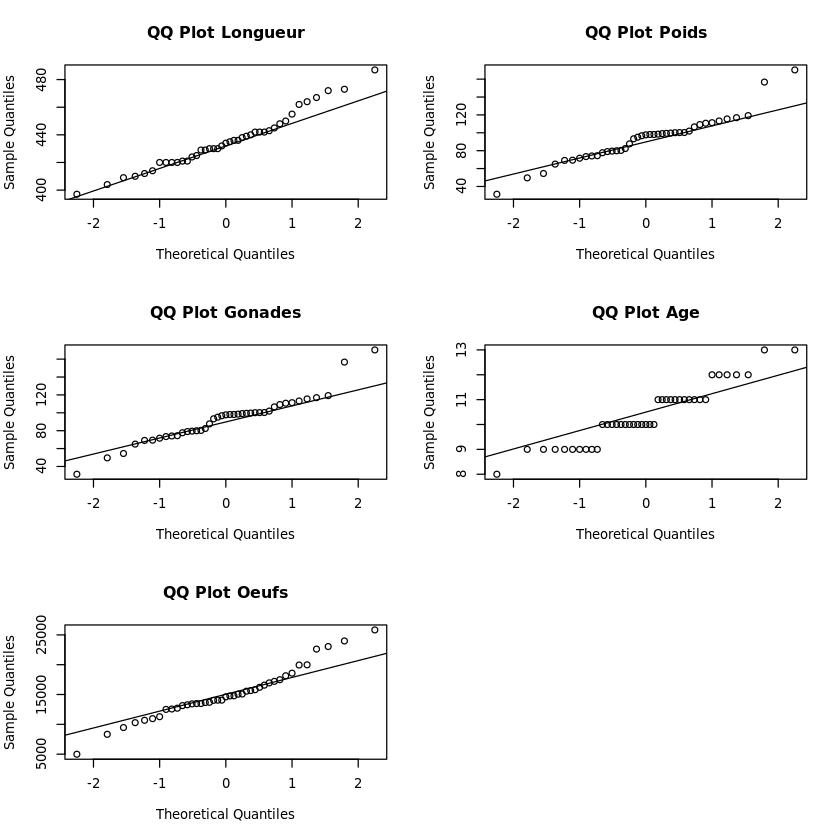

In [68]:
#cell 52
opar <- par()
par(mfrow = c(3, 2))
qqnorm(coregone$longueur_mm,main="QQ Plot Longueur")
qqline(coregone$longueur_mm)
qqnorm(coregone$poids_g,main="QQ Plot Poids")
qqline(coregone$poids_g)
qqnorm(coregone$poids_gonades_mg,main="QQ Plot Gonades")
qqline(coregone$poids_gonades_mg)
qqnorm(coregone$age_annee,main="QQ Plot Age")
qqline(coregone$age_annee)
qqnorm(coregone$oeufs_nombre,main="QQ Plot Oeufs")
qqline(coregone$oeufs_nombre)            
suppressWarnings(par(opar))

Pour aller plus loin, on peut tester la normalité de la distribution avec le test de shapiro:

In [69]:
#cell 53
shapiro.test(coregone$longueur_mm)


	Shapiro-Wilk normality test

data:  coregone$longueur_mm
W = 0.97165, p-value = 0.3896


In [70]:
#cell 54
shapiro.test(coregone$poids_g)


	Shapiro-Wilk normality test

data:  coregone$poids_g
W = 0.93983, p-value = 0.031


In [71]:
#cell 55
shapiro.test(coregone$poids_gonades_mg)


	Shapiro-Wilk normality test

data:  coregone$poids_gonades_mg
W = 0.93983, p-value = 0.031


In [72]:
#cell 56
shapiro.test(coregone$age_annee)


	Shapiro-Wilk normality test

data:  coregone$age_annee
W = 0.92799, p-value = 0.01239


In [73]:
#cell 57
shapiro.test(coregone$oeufs_nombre)


	Shapiro-Wilk normality test

data:  coregone$oeufs_nombre
W = 0.96143, p-value = 0.1765


---
__2. Comparaison des potentiels reproducteurs selon l’âge :__

Existe-t-il une différence du nombre d’œufs produits entre les poissons jeunes (âge inférieur à 10 ans) et âgés (âge supérieur ou égal à 10)?

- Créez une nouvelle variable qualitative pour identifier les deux groupes : les individus `jeunes` et les individus `âgés`

_Fonction recommandées:_
`which()` ou `subset()`

In [74]:
#cell 58
coregone$classe_age <- NA
coregone[which(coregone[,4] <= 10),"classe_age"] <- "jeune"
coregone[which(coregone[,4] > 10),"classe_age"] <- "vieux" 

In [75]:
#cell 58.2
table(coregone$classe_age)


jeune vieux 
   23    18 

- Représentez la distribution de la variable œufs en fonction de la variable âge.
    
_Fonctions recommandées_
        `boxplot()`, `stripchart()`

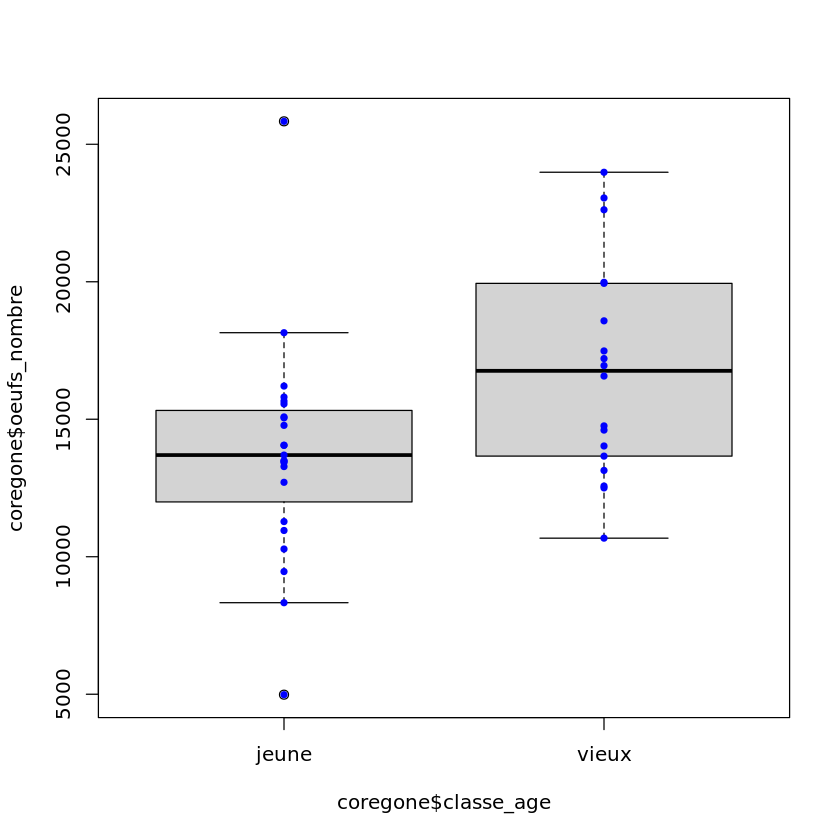

In [76]:
#cell 59
boxplot(coregone$oeufs_nombre ~ coregone$classe_age) 
stripchart(coregone$oeufs_nombre ~ coregone$classe_age, col = "blue", add = TRUE, vertical = TRUE, pch = 20) 

*__Pour aller plus loin:__*

On peut estraire les données du boxplot sans le tracer :
ex avec la commande ci-dessus qui permet d'extraire les stats, c'est à dire les valeurs correspondant au dessin de la boite à moustache.


In [77]:
#cell 59.2
print(boxplot(coregone$oeufs_nombre~coregone$classe_age, plot=F)$stats)

        [,1]    [,2]
[1,]  8328.0 10676.0
[2,] 11993.0 13659.0
[3,] 13697.0 16760.5
[4,] 15320.5 19942.0
[5,] 18147.0 23982.0


En plus: representation des donnees par âge

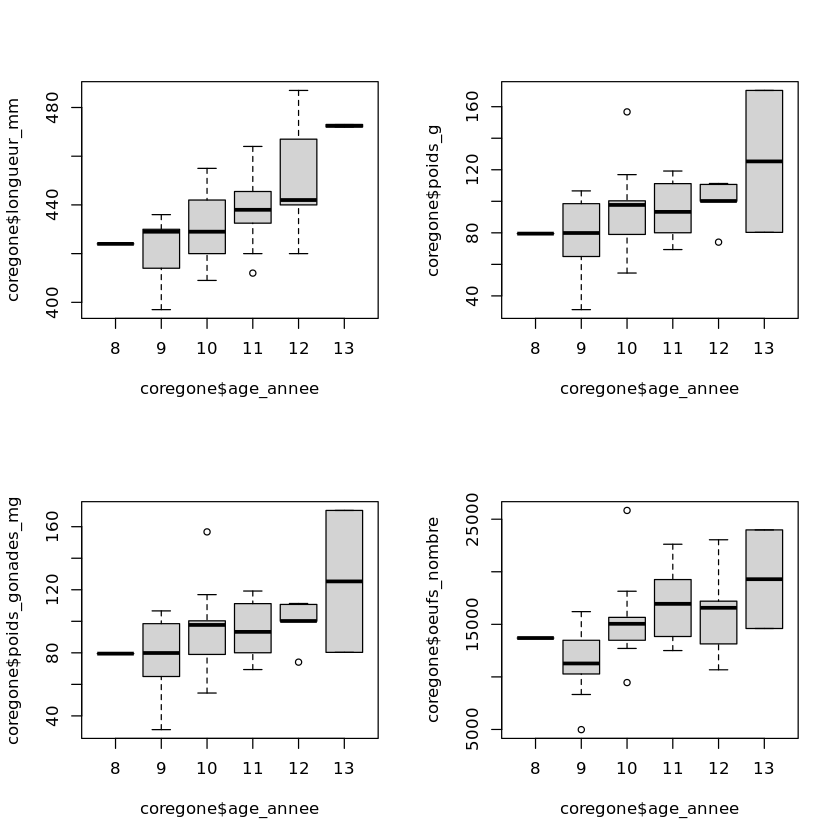

In [78]:
#cell 59.3
opar <- par()
par(mfrow=c(2,2))
boxplot(coregone$longueur_mm~coregone$age_annee) 
boxplot(coregone$poids_g~coregone$age_annee)
boxplot(coregone$poids_gonades_mg~coregone$age_annee)
boxplot(coregone$oeufs_nombre~coregone$age_annee)
suppressWarnings(par(opar))

- Calculez les moyennes dans chaque groupe du nombre d’œufs
    
_Fonctions recommandées:_
        `tapply()`, `mean()`


In [79]:
#cell 60
tapply(coregone$oeufs_nombre, coregone$classe_age, mean, na.rm = TRUE)

jeune    vieux 
13721.83 16794.39

Mieux que `apply()` ici, la fonction `tapply()` ci-dessus permet d'appliquer une fonction comme la moyenne en fonction d'une variable categorique prise comme un facteur

In [80]:
#cell 60.2
# ou par vecteur en deux lignes:
mean(coregone$oeufs_nombre[which(coregone$classe_age == "jeune")])
mean(subset(coregone, classe_age == "vieux")$oeufs_nombre) # ou ici avec subset au lieu de which

[1] 13721.83

[1] 16794.39

- Existe-t-il une différence entre ces moyennes ?
    
_Fonctions recommandées:_
        `t.test()`, `wilcox.test()`

In [81]:
#cell 61
t.test(coregone$oeufs_nombre~coregone$classe_age)


	Welch Two Sample t-test

data:  coregone$oeufs_nombre by coregone$classe_age
t = -2.4862, df = 36.672, p-value = 0.01759
alternative hypothesis: true difference in means between group jeune and group vieux is not equal to 0
95 percent confidence interval:
 -5577.3332  -567.7924
sample estimates:
mean in group jeune mean in group vieux 
           13721.83            16794.39 


In [82]:
#cell 62
wilcox.test(coregone$oeufs_nombre~coregone$classe_age)

Warning message in wilcox.test.default(x = c(9461L, 8328L, 10281L, 4984L, 13697L, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  coregone$oeufs_nombre by coregone$classe_age
W = 124, p-value = 0.0302
alternative hypothesis: true location shift is not equal to 0


- Existe-t-il une relation linéaire entre le poids des gonades et le nombre d’oeufs produits ?
   
_Fonctions recommandées:_
        `plot()`,
        `cor()`,
        `lm()`,
        `cor.test()`


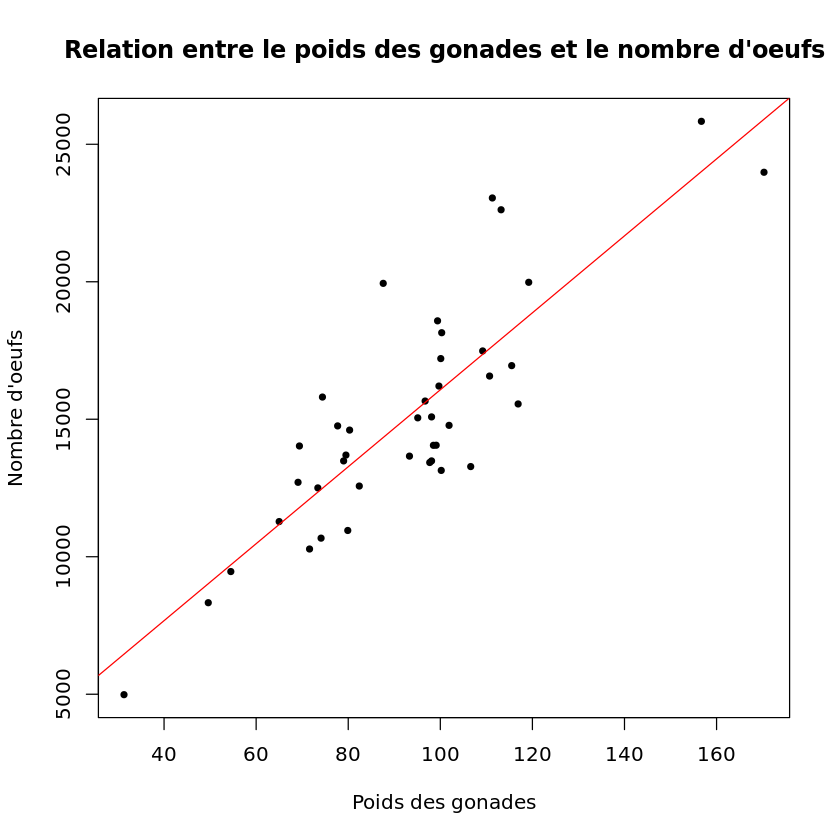

In [83]:
#cell 63
plot(coregone$oeufs_nombre ~ coregone$poids_gonades_mg, xlab = "Poids des gonades", ylab = "Nombre d'oeufs",pch = 20, main = "Relation entre le poids des gonades et le nombre d'oeufs")
abline(lm(coregone$oeufs_nombre ~ coregone$poids_gonades_mg),col="red")

In [84]:
#cell 64
cor.test(coregone$oeufs_nombre, coregone$poids_gonades_mg)


	Pearson's product-moment correlation

data:  coregone$oeufs_nombre and coregone$poids_gonades_mg
t = 9.9292, df = 39, p-value = 3.128e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7285804 0.9156779
sample estimates:
      cor 
0.8464914 


In [85]:
#cell 65
summary(lm(coregone$oeufs_nombre ~ coregone$poids_gonades_mg))


Call:
lm(formula = coregone$oeufs_nombre ~ coregone$poids_gonades_mg)

Residuals:
   Min     1Q Median     3Q    Max 
 -3717  -1772   -244   1221   5605 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2078.30    1354.89   1.534    0.133    
coregone$poids_gonades_mg   139.94      14.09   9.929 3.13e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2250 on 39 degrees of freedom
Multiple R-squared:  0.7165,	Adjusted R-squared:  0.7093 
F-statistic: 98.59 on 1 and 39 DF,  p-value: 3.128e-12


__Conclusion__

Que pouvez-vous conclure quant à lâge des poissons et la production des oeufs?

=> Les poissons âgés ont tendance à pondre plus d’oeufs que les jeunes, ce qui est en relation avec le poids de leurs gonades

*Vous pouvez ensuite tester l’effet d’autres variables sur la variable « oeufs ».*

## Exercice 7 : analyse en composantes principales
---



Nous allons utiliser le paquet **FactoMiner** (Husson et al.) qui rassemble un lot de fonctions pour réaliser une ACP sous R.
En principe ce paquet a été installé dans la "bibliothèque" de l'environnement. Chargez-le avec la fonction `library()` avec commande suivante:

In [86]:
# cell 66
library("FactoMineR")

La fonction `sessionInfo()` permet de s'assurer qu'il a bien été chargé avec la version 2.4.

In [87]:
# cell 67
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] FactoMineR_2.4

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3         pillar_1.7.0         compiler_4.1.2      
 [4] base64enc_0.1-3      tools_4.1.2          digest_0.6.29       
 [7] uuid_1.0-4           lattice_0.20-45      jsonlite_1.8.0      
[10] evaluate_0.15        lifecycle_1.0.1      t

Pour visualiser les résultats, nous avons besoin de 2 autres paquets **factoextra** et **ggpbur** que nous allons installer manuellement dans un nouveau réperrtoire de notre home. <mark> Cela peut perndre quelques minutes, soyez patients </mark>

In [88]:
# cell 68
system("mkdir ~/R_lib")
install.packages("factoextra", lib = '~/R_lib/')
install.packages("ggpubr", lib = '~/R_lib/')

also installing the dependencies ‘corrplot’, ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘dendextend’, ‘ggpubr’




Nous chargeons ces paquets dans notre session R et le vérifions.

In [89]:
# cell 69
library("factoextra", lib.loc = '~/R_lib/')
library("ggpubr", lib.loc = '~/R_lib/')
sessionInfo()

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /srv/conda/envs/notebook/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggpubr_0.4.0     factoextra_1.0.7 ggplot2_3.3.5    FactoMineR_2.4  

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-7         tidyselect_1.1.2     repr_1.1.4          
 [4] purrr_0.3.4          lattice_0.20-45      carData_3.0-5       
 [7] colorspace_2.0-3     vctrs_0.3.8          generics_0.1.2  

---
Pour cet exercice, nous allons charger le jeu de données **iris**. Vous pouvez consulter de quoi il s'agit avec l'aide `?` ou  `help()`.

In [90]:
# cell 70
?iris

iris {datasets},R Documentation


- Chargez les données avce la fonction `data()`et regardez la structure de l'objet importé avec la fonction `str()`

In [91]:
# cell 71
data(iris)
str(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


---
### 7.1. Faire une ACP

- **L'ACP se réalise sur des variables quantitatives uniquement**. Créez un sous dataset que vous appelerez iris2 excluant la dernière colonne.

In [92]:
# cell 72
iris2 <- iris[,-5]
str(iris2)

'data.frame':	150 obs. of  4 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...


- Avec la fonction `PCA` de **FactoMineR**, réalisez l'ACP et sauvergardez le résultat dans un objet `res.pca`

In [93]:
# cell 73
res.pca <- PCA(iris2, graph = FALSE)
str(res.pca)

List of 5
 $ eig : num [1:4, 1:3] 2.9185 0.914 0.1468 0.0207 72.9624 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "comp 1" "comp 2" "comp 3" "comp 4"
  .. ..$ : chr [1:3] "eigenvalue" "percentage of variance" "cumulative percentage of variance"
 $ var :List of 4
  ..$ coord  : num [1:4, 1:4] 0.89 -0.46 0.992 0.965 0.361 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. .. ..$ : chr [1:4] "Dim.1" "Dim.2" "Dim.3" "Dim.4"
  ..$ cor    : num [1:4, 1:4] 0.89 -0.46 0.992 0.965 0.361 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. .. ..$ : chr [1:4] "Dim.1" "Dim.2" "Dim.3" "Dim.4"
  ..$ cos2   : num [1:4, 1:4] 0.792 0.212 0.983 0.931 0.13 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
  .. .. ..$ : chr [1:4] "Dim.1" "Dim.2" "Dim.3" "Dim.4"
 

### 7.2. Etude des valeurs propres de l'ACP

Vous obtenez une liste de 5 éléments, que vous pouvez extraire en indiquant avec un `$`. Vous pouvez par exemple récupérer les valeurs propres (*eigenvalues*) avec la commande ci-dessous. Elles mesurent la quantité de variance expliquée par chaque axe principal. Les premiers axes correspondent aux directions portant la quantité maximale de variation contenue dans le jeu de données.

In [94]:
# cell 74
res.pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,2.91849782,72.9624454,72.96245
comp 2,0.91403047,22.8507618,95.81321
comp 3,0.14675688,3.6689219,99.48213
comp 4,0.02071484,0.5178709,100.00000


- Représentez le graphique des éboulis (***scree plot***)de l'ACP, représentant le % de la variance expliquée par chacun des axes avec la fonction `fviz_eig()` du paquet **factoextra**  en spécifiant les arguments  `addlabels = TRUE`

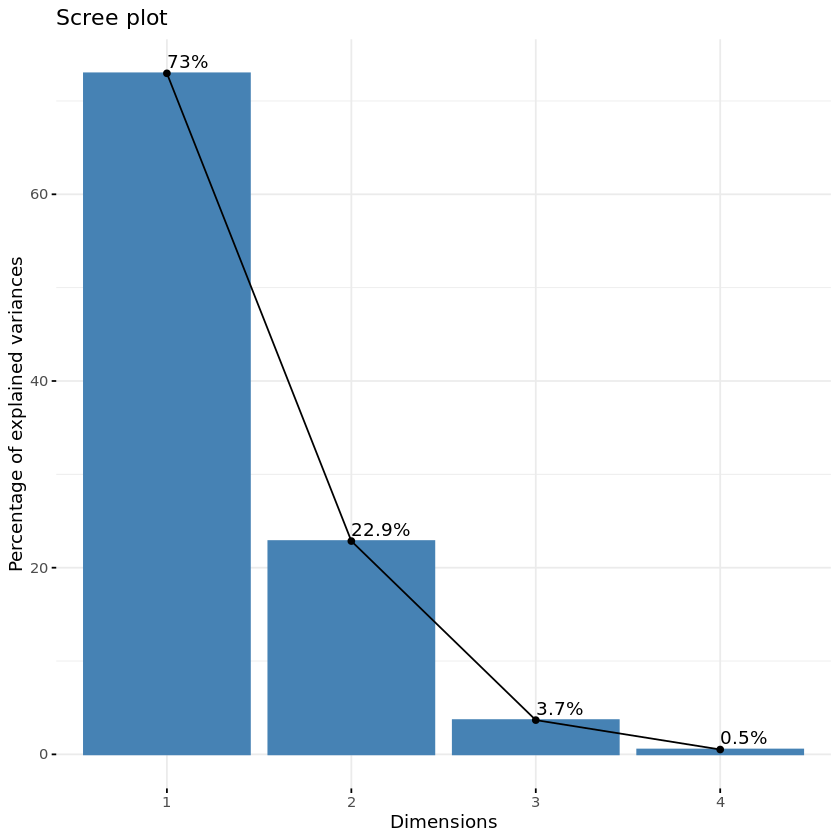

In [95]:
# cell 75
fviz_eig(res.pca, addlabels = TRUE)

<span style="color:blue">=> Que concluez-vous?</span>

=> Ainsi, avec les 2 1ères composantes, on explique plus de 95% de la variance des 4 variables.

### 7.3. Etude des individus

On peut étudier la variabilité entre individus.
Y a-t-il des similarités entre les individus pour toues les variables? Peut-on établir des profils d'individus? Peut-on opposer un groupe d'inidvidus à un autre?

- A présent, représentez les observations sur le plan des 2 1ères composantes avec la fonction `plot()` directement sur le résultat de votre ACP.

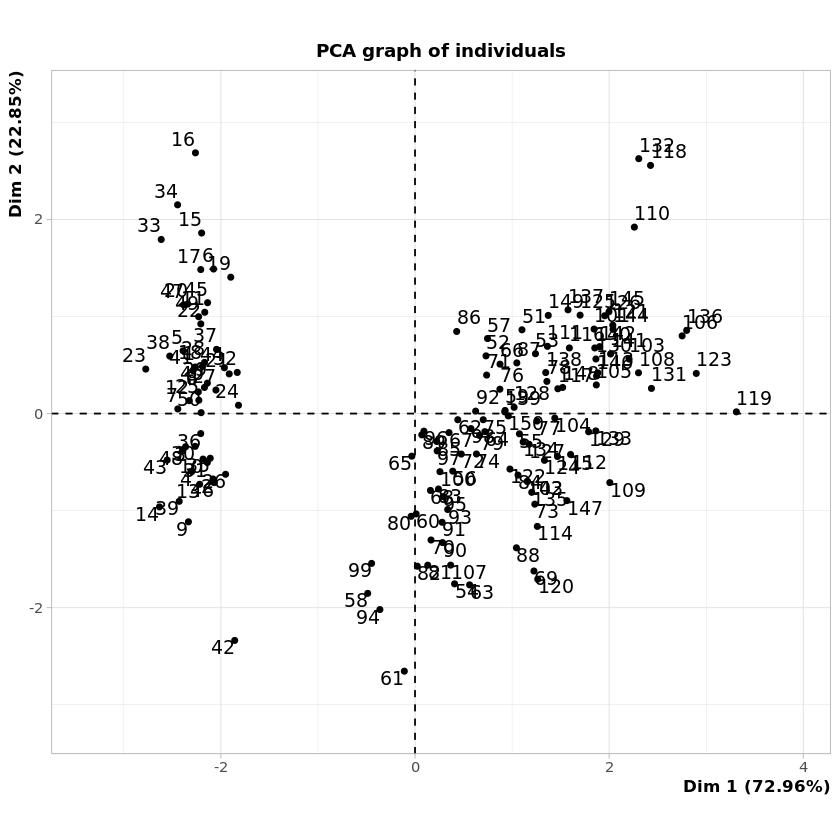

In [96]:
# cell 76
plot(res.pca)

Il existe une fonction dans factoextra permettant de réaliser le même graphique et de le personnaliser avec différents paramètres:

- on commence par dessiner le graphique sans les identifiants des observations:

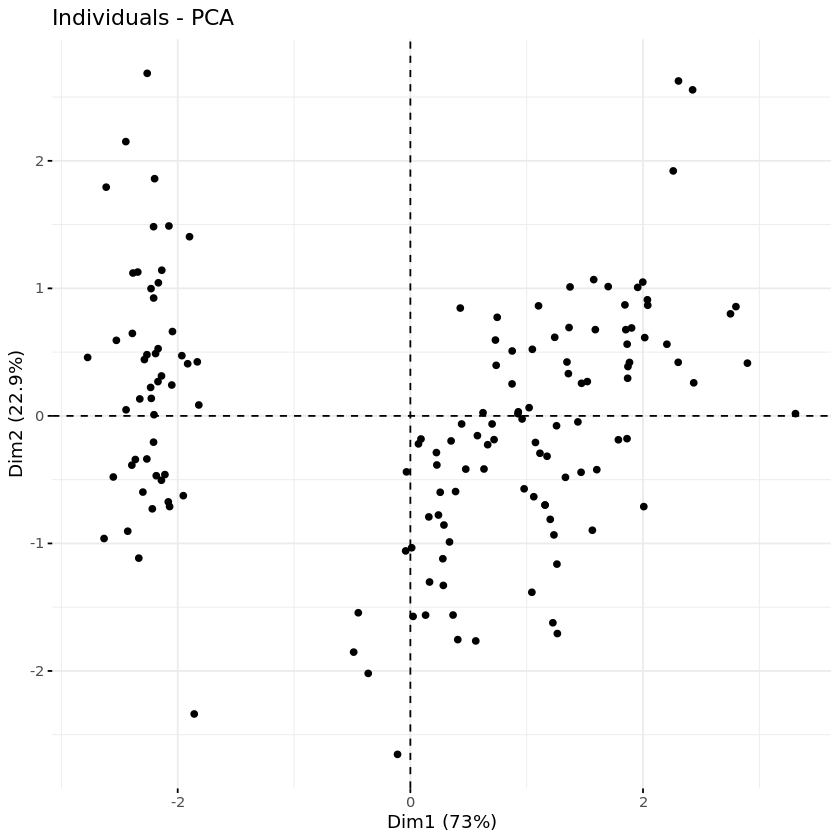

In [97]:
# cell 77
# include only individuals with no labels
fviz_pca_ind(res.pca, label = "none")

- on peut spécifier à quel espèce les obesrvations appartiennent avec l'argument habillage

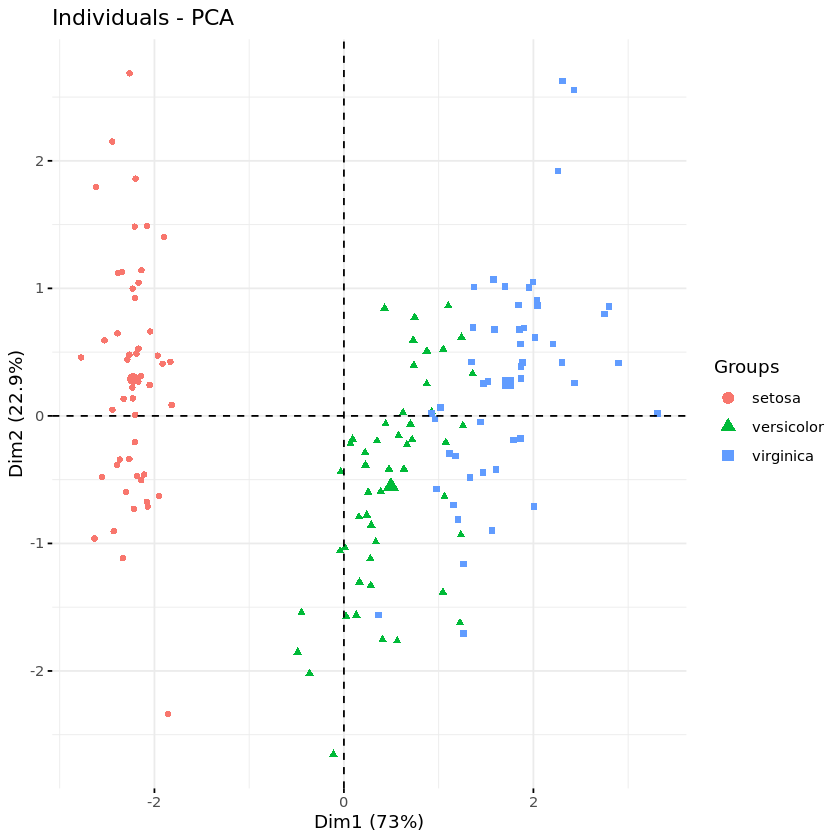

In [98]:
# cell 78
# use Species from iris to change habillage
fviz_pca_ind(res.pca, label = "none", habillage = iris$Species)

- on peut ajouter des ellipses autour des clusters de'obersvations avec leur barycentre en gras

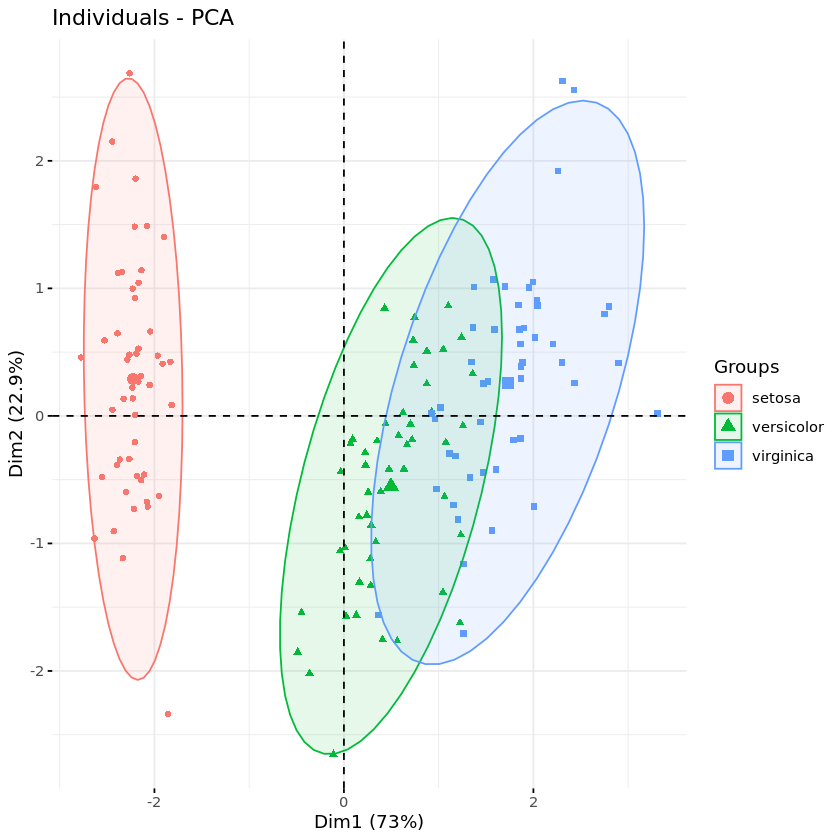

In [99]:
# cell 79
# add ellipses
fviz_pca_ind(res.pca, label="none", habillage = iris$Species,
             addEllipses = TRUE, ellipse.level = 0.95)

<span style="color:blue">=> Que concluez-vous?</span>

=> La population setosa se distingue des deux autres

### 7.4. Lien entre les individus et les variables

On se demande si on peut caractériser des groupes d'individus par des variables?
Le biplot premet de représenter les varianles et individus en même temps.

- Avec la fonction fviz_pca() on peut générer un **biplot** affichant également les contributions de chaque variable du dataset.

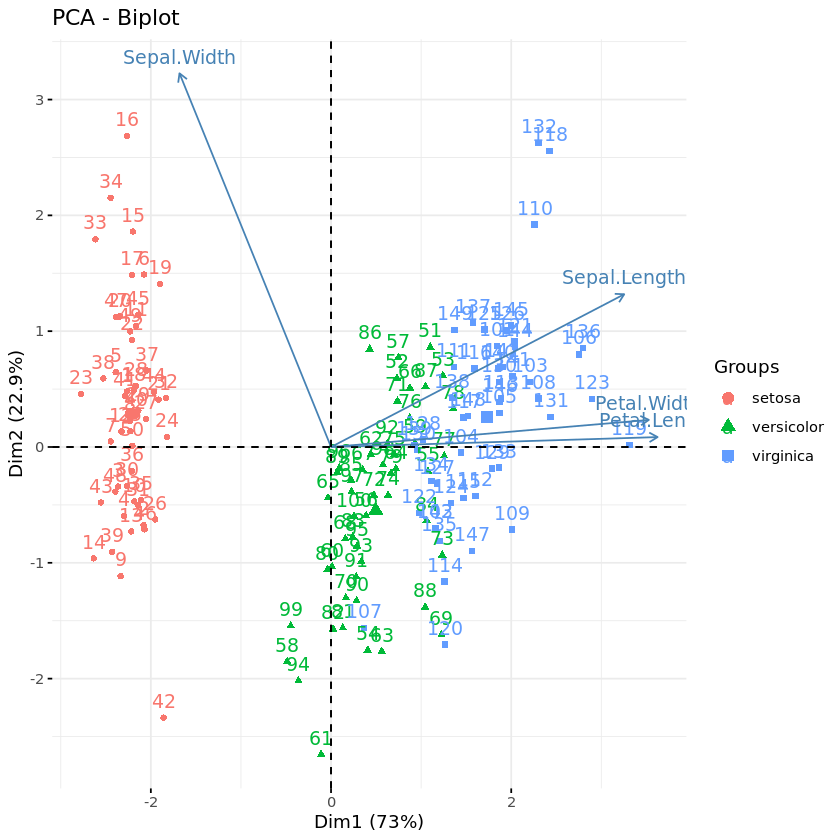

In [100]:
# cell 80
fviz_pca(res.pca, habillage = iris$Species)

Il y a quelques points mal classés comme le 42.

### 7.5. Etude des variables

- Une alternative est de réprésenter ces variables sans les observations afin de bien voir lesquelles sont les mieux projetées sur le plan de l'ACP. On affiche le **cercle  des corrélations**.


Plus la valeur de la contribution est importante, plus la variable contribue à la composante principale en question.<br>
Les contributions des variables sont exprimées en pourcentage.<br>
Les variables corrélées avec PC1 (i.e., Dim.1) et PC2 (i.e., Dim.2) sont les plus importantes pour expliquer la variabilité dans le jeu de données. <br>
Les variables qui ne sont pas en corrélation avec un axe ou qui sont corrélées avec les derniers axes sont des variables à faible apport et peuvent être supprimées pour simplifier l’analyse globale.


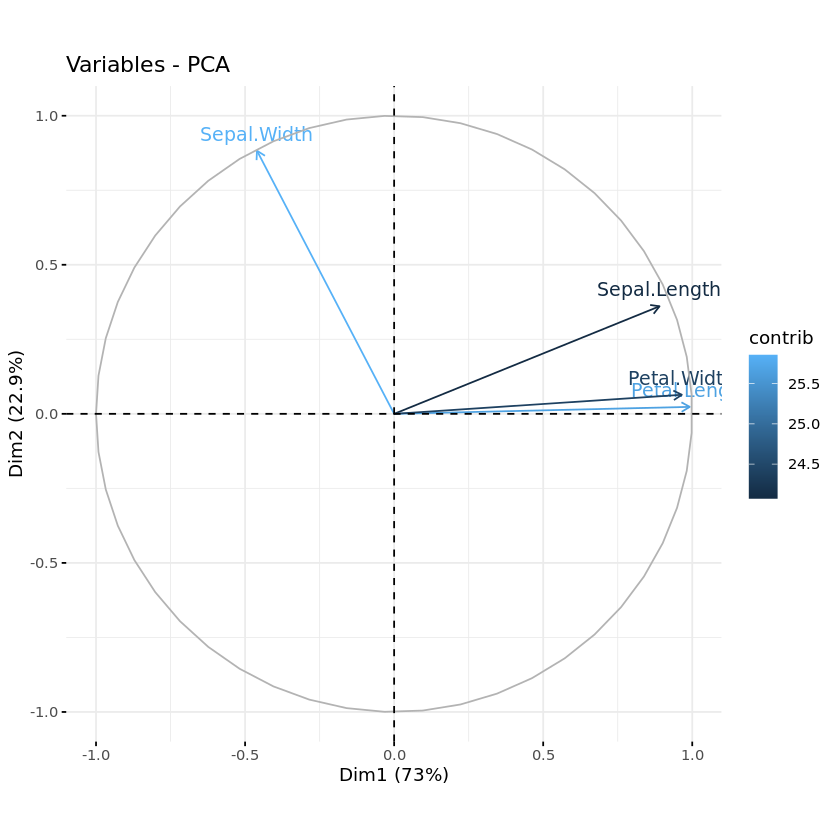

In [101]:
# cell 81
# include only contributions of variables to clean it up
fviz_pca_var(res.pca, col.var = "contrib")

<span style="color:blue">=> Que concluez-vous?</span>

=> Toutes les variables se projettent bien car la pointe des flèches approche de la circonférence du cercle. Cela signifie que la projection de la variable donne une bonne idée de sa contribution.

De plus, ici Petal.Width et Petal.Length sont fortement corrélées entre elles et se projettent sur l'axe 1.
La variable Speal.Width est celle qui se projette le plus sur l'axe 2. Comme elle est perpendicualaire à Petal.Length, ces 2 variables sont indépendantes (pas corrélées du tout).

- Contribution des variables aux axes principaux

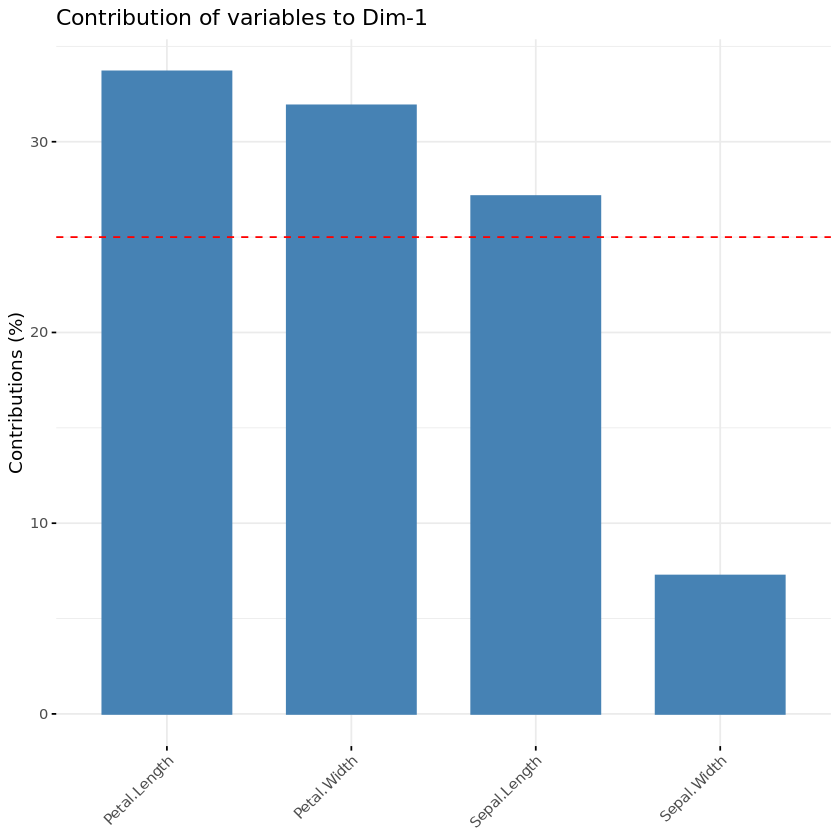

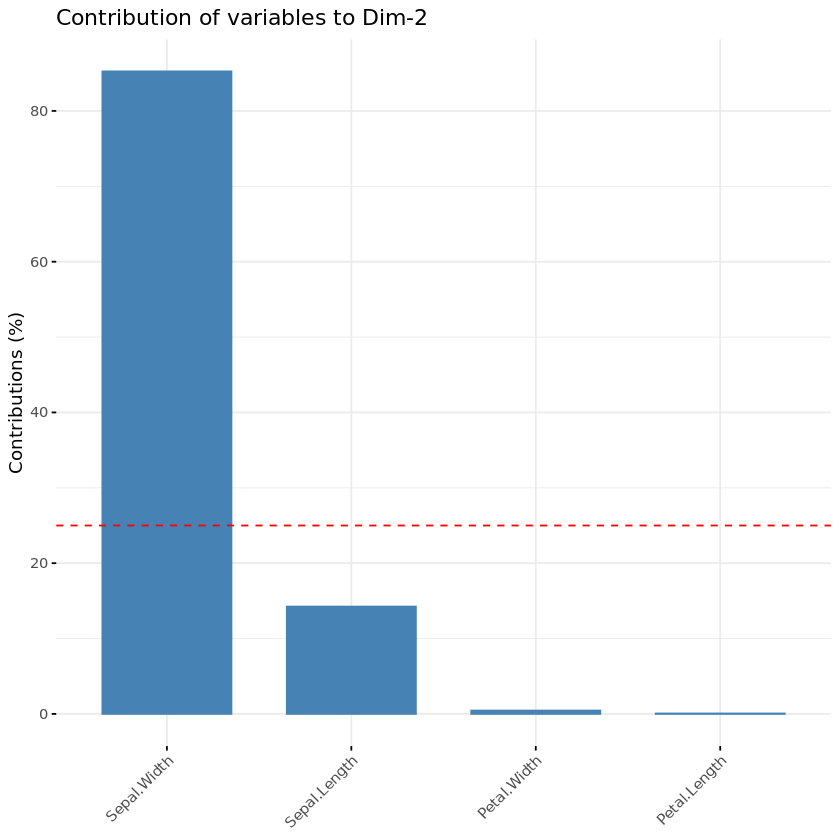

In [102]:
# cell 82
# Contributions des variables à PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions des variables à PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

### 7.6 Synthèse

On peut finalement faire un graphique complet de l'ensemble de l'analyse:

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



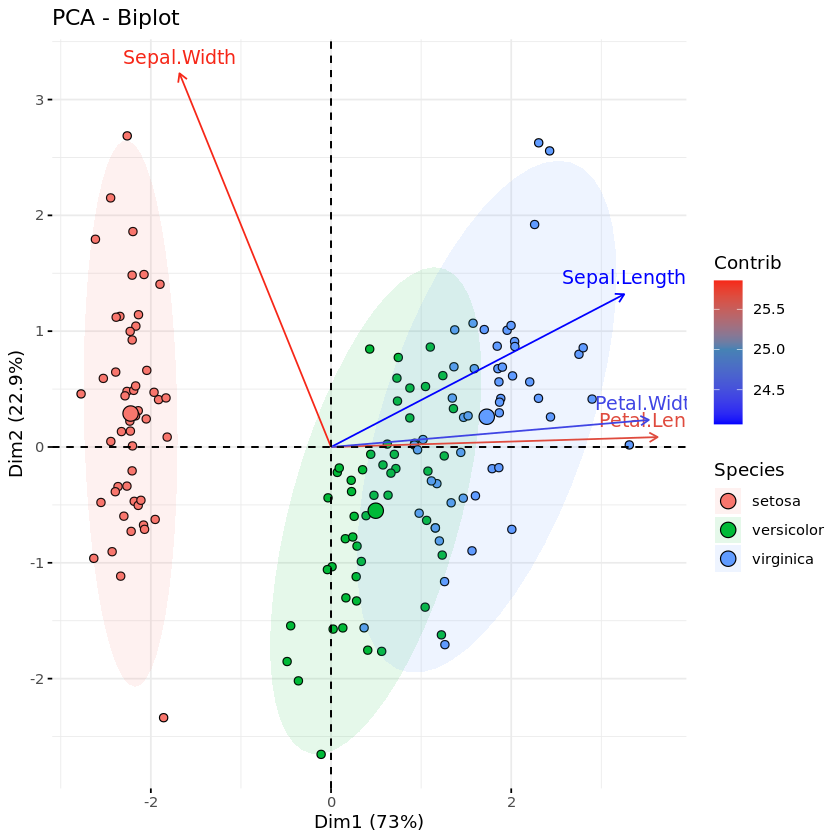

In [103]:
# cell 83
# Make a pretty biplot
fviz_pca_biplot(res.pca,
                # individuals
                geom.ind = "point",
                fill.ind = iris$Species, col.ind = "black",
                pointshape = 21, pointsize = 2,
                addEllipses = TRUE,
                # variables
                col.var = "contrib",
                gradient.cols = "RdYlBu",
                legend.title = list(fill = "Species",
                                    color = "Contrib",
                                    alpha = "Contrib")) +
  scale_color_gradient2(low = "blue", mid = "steelblue", high = "red", midpoint = 25.0)

---
---

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You now know how to do basic statistics and more advanced exploratory analyses of your data.
</div>
    

<div class="alert alert-block alert-warning"><b>Warning:</b><br>
 Don't forget to save you notebook and export a copy as an <b>html</b> file as well <br>
- Open "File" in the Menu<br>
- Select "Export Notebook As"<br>
- Export notebook as HTML<br>
- You can then open it in your browser even without being connected to a JupyterLab interface!
</div>

***
***
## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>